<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#create-dico-strong-labels" data-toc-modified-id="create-dico-strong-labels-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>create dico strong labels</a></span></li><li><span><a href="#create_dico_weak_labels" data-toc-modified-id="create_dico_weak_labels-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>create_dico_weak_labels</a></span></li><li><span><a href="#create-fileID-2-wav-arrays-dicts" data-toc-modified-id="create-fileID-2-wav-arrays-dicts-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>create fileID 2 wav arrays dicts</a></span></li><li><span><a href="#create-fileID-2-wav-arrays-dict-for-U" data-toc-modified-id="create-fileID-2-wav-arrays-dict-for-U-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>create fileID 2 wav arrays dict for U</a></span></li><li><span><a href="#create-fileID-2-wav-arrays-dict-for-EVAL" data-toc-modified-id="create-fileID-2-wav-arrays-dict-for-EVAL-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>create fileID 2 wav arrays dict for EVAL</a></span></li><li><span><a href="#split-train_weak-into-train/dev-90/10" data-toc-modified-id="split-train_weak-into-train/dev-90/10-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>split train_weak into train/dev 90/10</a></span></li></ul></li><li><span><a href="#My-Generator-weak-+-strong" data-toc-modified-id="My-Generator-weak-+-strong-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>My Generator weak + strong</a></span><ul class="toc-item"><li><span><a href="#definition" data-toc-modified-id="definition-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>definition</a></span></li><li><span><a href="#instances" data-toc-modified-id="instances-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>instances</a></span></li></ul></li><li><span><a href="#loss-functions" data-toc-modified-id="loss-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>loss functions</a></span></li><li><span><a href="#Model-definition" data-toc-modified-id="Model-definition-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model definition</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Test-model" data-toc-modified-id="Test-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Test model</a></span><ul class="toc-item"><li><span><a href="#load-a-model" data-toc-modified-id="load-a-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>load a model</a></span></li><li><span><a href="#Dog-Speech-file" data-toc-modified-id="Dog-Speech-file-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Dog Speech file</a></span></li><li><span><a href="#Val-subset" data-toc-modified-id="Val-subset-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Val subset</a></span></li></ul></li><li><span><a href="#Localization" data-toc-modified-id="Localization-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Localization</a></span><ul class="toc-item"><li><span><a href="#Global-opti" data-toc-modified-id="Global-opti-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Global opti</a></span></li><li><span><a href="#class-wise-opti" data-toc-modified-id="class-wise-opti-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>class-wise opti</a></span><ul class="toc-item"><li><span><a href="#absolute-threshold" data-toc-modified-id="absolute-threshold-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>absolute threshold</a></span></li><li><span><a href="#hysteresis" data-toc-modified-id="hysteresis-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>hysteresis</a></span></li></ul></li></ul></li><li><span><a href="#Eval-subset" data-toc-modified-id="Eval-subset-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Eval subset</a></span></li></ul></div>

Authors:

Thomas Pellegrini, thomas.pellegrini@irit.fr

Leo Cances, leo.cances@irit.fr

June 2019

# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import soundfile as sf
import librosa
import muda
import jams

import os 

from scipy.misc import imresize
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

import pickle

from dcase_util.containers import MetaDataContainer

import tqdm


In [2]:
import sys
sys.path.append('../dcase2018/dcase2018_task4')

import Metrics

Using TensorFlow backend.


In [3]:
import keras 

# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg19 import VGG19
# from keras.utils.vis_utils import plot_model
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array

from keras.models import model_from_json, load_model

# from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
# from keras.applications.vgg19 import decode_predictions as vgg19_decode_predictions

from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Input, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, Lambda, \
    Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation, TimeDistributed, \
    GRU, Reshape, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, SpatialDropout2D, \
    Concatenate, Multiply
from keras import backend as K

import tensorflow as tf

In [4]:
K.set_image_data_format("channels_last")
K.image_data_format()

'channels_last'

In [5]:
K.clear_session()

In [6]:
# fixer les seeds

from numpy.random import seed
seed(123) # On peut utiliser n'importe quelle nombre

from tensorflow import set_random_seed
set_random_seed(1234)

# Load data

In [7]:
class_correspondance = {"Alarm_bell_ringing": 0, "Speech": 1, "Dog": 2, "Cat": 3, "Vacuum_cleaner": 4,
                        "Dishes": 5, "Frying": 6, "Electric_shaver_toothbrush": 7, "Blender": 8, "Running_water": 9}

class_correspondance_reverse = dict()
for k in class_correspondance:
    class_correspondance_reverse[class_correspondance[k]] = k



In [8]:
# train :
#  weak : 1577
#  synthetic : 2045
#  unlabeled in domain : 14405
# validation : 1168

# Sur la page du challenge ils disent :

# train :
#  weak : 1578
#  synthetic : 2045
#  unlabeled in domain : 14412
# validation : 1168

# Il nous manque donc 1 weak et 7 unlabeled

In [9]:
validation_to_remove = ['Y0IxyUtHw6Ec_0.000_10.000.wav','Y-jLujkP1aaw_30.000_40.000.wav','Y9nNBz3phufo_40.000_50.000.wav','Y6iquQAQvoUs_285.000_295.000.wav','YzCdOEvduBTo_30.000_40.000.wav','YSRYarmLDPwc_204.000_214.000.wav','YT9v5TB7J6Ak_268.000_278.000.wav','Y2KbRYZ3Cp_c_149.000_159.000.wav','Y5iARe0XPQdg_95.000_105.000.wav','YmAg1_aL-fCY_30.000_40.000.wav','YOvK__OSdpJQ_74.000_84.000.wav','YNGgpSWcaV1U_63.000_73.000.wav','YSgTCzMs_1rA_125.000_135.000.wav','YTx_47yEnfCs_442.000_452.000.wav','YTyGA005YFXg_143.000_153.000.wav','YQ7q8xQijBCg_32.000_42.000.wav','YFxf5r3DNKXU_142.000_152.000.wav','Y8oTQbC9oDkY_27.000_37.000.wav','YAZBIHwmppHo_51.000_61.000.wav','YZfDu5aHVrAg_205.000_215.000.wav','YfS9TYqfz_Po_181.000_191.000.wav','YWBJVzaSvSsg_150.000_160.000.wav','Yn0sxrohD_TI_7.000_14.000.wav','Yt8E89lrV36A_285.000_295.000.wav','YxgQjEiwZsAk_146.000_156.000.wav','YwHk1-j5r1JU_385.000_395.000.wav','YU0Cg_t_3TdI_30.000_40.000.wav','Y70CtvdsGQf4_2.000_12.000.wav','Yc1_V2y_9KCM_369.000_379.000.wav','YY09tBEoLETY_440.000_450.000.wav','Y23R6_ppquxs_247.000_257.000.wav','Y-YwPSwhe2jo_30.000_40.000.wav','Y-RLILmQmubM_30.000_40.000.wav','YmBj0IJhv2hM_142.000_152.000.wav','YjF73O9J4KEI_30.000_40.000.wav','YuXDi40QfH9E_320.000_330.000.wav','YK1XOQR_O0aA_199.000_209.000.wav','Y-4pmCrSdMhg_30.000_40.000.wav','YQb6N3HvbmgQ_580.000_590.000.wav','Y7G4IXsu0KtU_72.000_82.000.wav','YSpVEDyy9AIY_69.000_79.000.wav','Y09kqMqn5rWs_260.000_270.000.wav','YzDULhAxsJfY_60.000_70.000.wav','YR3_Gqgl-NYE_50.000_60.000.wav','Yb8GxUkjLSUY_628.000_638.000.wav','Y86owBlJa8f0_24.000_34.000.wav']
len(validation_to_remove)

46

In [10]:
def read_csv_list(fpath):
    file_list = []
    with open(fpath, 'rt') as fh:
        for l in fh:
            file_list.append(l.rstrip())

    return file_list


def write_csv_list(lst, fpath):
    with open(fpath, 'wt') as fh:
        for el in lst:
            fh.write('%s\n'%el)


datadir='/baie/travail/thomas/dcase2019/subsets'
# wav_lst_train_weak = read_csv_list(datadir + '/' + 'subset_train_weak_1505files_wav.lst')
wav_lst_train_weak_TRAIN = read_csv_list(datadir + '/' + 'subset_train_weak_TRAIN_1354files_wav.lst')
wav_lst_train_weak_DEV = read_csv_list(datadir + '/' + 'subset_train_weak_DEV_151files_wav.lst')
wav_lst_train_synthetic = read_csv_list(datadir + '/' + 'subset_train_synthetic_2045files_wav.lst')
wav_lst_train_uid = read_csv_list(datadir + '/' + 'subset_train_uid_14412files_wav.lst')
wav_lst_train_weak_synthetic = wav_lst_train_weak_TRAIN + wav_lst_train_weak_DEV + wav_lst_train_synthetic
wav_lst_evaluation = read_csv_list(datadir + '/' + 'eval.csv')

# wav_lst_test_dcase2018 = read_csv_list(datadir + '/' + 'subset_test_dcase2018_923files_wav.lst')
# wav_lst_eval_dcase2018 = read_csv_list(datadir + '/' + 'subset_eval_dcase2018_880files_wav.lst')
wav_lst_validation = read_csv_list(datadir + '/' + 'subset_validation_1122files_wav.lst')
# wav_lst_validation = read_csv_list(datadir + '/' + 'subset_validation_1103files_wav.lst')
# wav_lst_validation_leo = read_csv_list(datadir + '/' + 'subset_validation_leo_wav.lst')

# remove wav with no tags at all:
print('len(wav_lst_validation)', len(wav_lst_validation))
wav_lst_validation = [el for el in wav_lst_validation if el not in validation_to_remove] 
# print('len(wav_lst_validation_leo)', len(wav_lst_validation_leo))
# wav_lst_validation_leo = [el for el in wav_lst_validation_leo if el not in validation_to_remove] 

print('len(wav_lst_validation)', len(wav_lst_validation))
# print('len(wav_lst_validation_leo)', len(wav_lst_validation_leo))
print('len(wav_lst_evaluation)', len(wav_lst_evaluation))

# load weak labels dicts
dico_tags_y_train_weak = pickle.load(open(datadir + '/dico_tags_y_train_weak_1505files.pkl', 'rb'))
dico_tags_y_train_synthetic = pickle.load(open(datadir + '/dico_tags_y_train_synthetic_2045files.pkl', 'rb'))
dico_tags_y_train_uid = None
# dico_tags_y_validation = pickle.load(open(datadir + '/dico_tags_y_validation_1058files.pkl', 'rb'))
dico_tags_y_validation = pickle.load(open(datadir + '/dico_tags_y_validation_1122files.pkl', 'rb'))

gt_tags_y_validation = np.zeros((len(wav_lst_validation), 10))
for i, v in enumerate(wav_lst_validation):
    gt_tags_y_validation[i] = dico_tags_y_validation[v]

# load strong label dicts
dico_strong_y_train_weak = None
dico_strong_y_train_synthetic = pickle.load(open(datadir + '/dico_strong_y_train_synthetic_2045files.pkl', 'rb'))
dico_strong_y_train_uid = None
# dico_strong_y_validation = pickle.load(open(datadir + '/dico_strong_y_validation_1058files.pkl', 'rb'))
dico_strong_y_validation = pickle.load(open(datadir + '/dico_strong_y_validation_1122files.pkl', 'rb'))

# load wav dicts
dico_wav_train_weak = pickle.load(open(datadir + '/dico_wav_train_weak_1505files.pkl', 'rb'))
dico_wav_train_synthetic = pickle.load(open(datadir + '/dico_wav_train_synthetic_2045files.pkl', 'rb'))
# dico_wav_validation = pickle.load(open(datadir + '/dico_wav_validation_1058files.pkl', 'rb'))
dico_wav_validation = pickle.load(open(datadir + '/dico_wav_validation_1122files.pkl', 'rb'))
dico_wav_evaluation = pickle.load(open(datadir + '/dico_wav_evaluation_13190files.pkl', 'rb'))

print(len(dico_tags_y_train_weak), len(dico_tags_y_train_synthetic), len(dico_tags_y_validation))
print(len(dico_strong_y_train_synthetic), len(dico_strong_y_validation))
print(len(dico_wav_train_weak), len(dico_wav_train_synthetic), len(dico_wav_validation))
print(len(dico_wav_evaluation))

# merge train_weak and train_synthetic dicts
dico_tags_y_train_weak_synthetic = {**dico_tags_y_train_weak, **dico_tags_y_train_synthetic}
dico_strong_y_train_weak_synthetic = None
dico_wav_train_weak_synthetic = {**dico_wav_train_weak, **dico_wav_train_synthetic}

print(len(dico_tags_y_train_weak_synthetic), len(dico_wav_train_weak_synthetic))

len(wav_lst_validation) 1122
len(wav_lst_validation) 1122
len(wav_lst_evaluation) 13190
1505 2045 1122
2045 1122
1505 2045 1122
13190
3550 3550


In [12]:
tags = np.zeros((len(wav_lst_train_synthetic), 10))
for i, v in enumerate(wav_lst_train_synthetic):
    tags[i] = dico_tags_y_train_synthetic[v]
wav_lst_train_synthetic[:7], tags[:7], dico_tags_y_train_synthetic['10.wav']

NameError: name 'dico_tags_y_train_synthetic' is not defined

In [13]:
tags = np.zeros((len(wav_lst_validation), 10))
for i, v in enumerate(wav_lst_validation):
    tags[i] = dico_tags_y_validation[v]
wav_lst_validation[:7], tags[:7], dico_tags_y_validation['Y0eh_N-cmcuI_350.000_360.000.wav']

(['Y00pbt6aJV8Y_350.000_360.000.wav',
  'Y00pK0GMmE9s_70.000_80.000.wav',
  'Y02sD1KJeoGA_50.000_60.000.wav',
  'Y0bjUq9XMMmQ_30.000_40.000.wav',
  'Y0cH_NlhhMAs_30.000_40.000.wav',
  'Y0eh_N-cmcuI_350.000_360.000.wav',
  'Y0hAK5f1tDok_30.000_40.000.wav'],
 array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]]),
 array([1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]))

## create dico strong labels

In [109]:
import math
def create_dico_strong_labels(label_csv_fpath, audio_dir):
    dico_strong = {} # keys: .wav files, values: y temporal label
    wav_lst = []
    
    ms2sample_ratio = 431. / 10.
    
    with open(label_csv_fpath, 'r') as fh:
        isFirstLine=True
        for ligne in fh:
            if isFirstLine:
                isFirstLine=False
                continue
            tab = ligne.rstrip().split('\t')
            
            fileid=tab[0]

            if not os.path.isfile(audio_dir + '/' + fileid):
                print('W: file does not exist:', audio_dir + '/' +  fileid)
                continue
            
            if not fileid in dico_strong:
                y_ = np.zeros((431, 10))

            if len(tab)>1:
                label = tab[-1]
                onset_in_sample = math.floor(float(tab[1]) * ms2sample_ratio)
                offset_in_sample = min(430, math.ceil(float(tab[2]) * ms2sample_ratio))
                for t in range(onset_in_sample, offset_in_sample+1):
                    y_[t, class_correspondance[label]] = 1

                dico_strong[fileid] = y_
            else:
                print('W: no label for file', audio_dir + '/' +  fileid)
#                 print(fileid)
#                 dico_strong[fileid] = y_
                
    if len(dico_strong)>1:
        return dico_strong, wav_lst
    else: return None

In [114]:
audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/train/synthetic'
label_csv_fpath='/baie/corpus/DCASE2019/task4/dataset/metadata/train/synthetic.csv'

# audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/validation'
# label_csv_fpath='/baie/corpus/DCASE2019/task4/dataset/metadata/validation/validation.csv'

dico_strong, wav_lst = create_dico_strong_labels(label_csv_fpath, audiodir)

In [115]:
len(dico_strong)# , dico_strong['Y0eh_N-cmcuI_350.000_360.000.wav'].shape

2045

In [121]:
sample2ms_ratio = 10. / 431.
toto = dico_strong['10.wav']
# toto = dico_strong['Y0eh_N-cmcuI_350.000_360.000.wav']
# toto = dico_strong_y_validation['Y0eh_N-cmcuI_350.000_360.000.wav']
for i in range(431):
    print('%.3f %s'%(i*sample2ms_ratio, toto[i]))

0.000 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.023 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.046 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.070 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.093 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.116 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.139 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.162 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.186 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.209 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.232 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.255 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.278 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.302 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.325 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.348 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.371 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.394 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.418 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.441 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.464 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.487 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.510 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.534 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.557 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.580 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.603 [1. 0.

In [116]:
pkl_dico='dico_strong_y_train_synthetic_2045files.pkl'
# pkl_dico='dico_strong_y_validation_1058files.pkl'
# pkl_dico='dico_strong_y_validation_1122files.pkl'
# pkl_dico='dico_strong_y_validation_1168files.pkl'
pickle.dump( dico_strong, open( datadir + '/' + pkl_dico, "wb" ) )

In [120]:
# dico_strong_y_validation['Y0eh_N-cmcuI_350.000_360.000.wav']

In [119]:
# dico_strong_y_train_synthetic['10.wav']

## create_dico_weak_labels

In [65]:
def create_dico_weak_labels(label_csv_fpath, audio_dir):
    dico_weak = {} # keys: .wav files, values: y label
    wav_lst = []
    
    with open(label_csv_fpath, 'r') as fh:
        isFirstLine=True
        for ligne in fh:
            if isFirstLine:
                isFirstLine=False
                continue
            tab = ligne.rstrip().split('\t')
            
            fileid=tab[0]

            if not os.path.isfile(audio_dir + '/' + fileid):
                print('W: file does not exist:', audio_dir + '/' +  fileid)
                continue

            if len(tab)>1:
                labels = tab[-1].split(',')
                if not fileid in dico_weak:
                    y_ = np.zeros((10,))
                if len(labels)>0:
                    for l in labels:
                        y_[class_correspondance[l]] = 1

                dico_weak[fileid] = y_
            else:
                print('W: no label for file', audio_dir + '/' +  fileid)
    if len(dico_weak)>1:
        return dico_weak, wav_lst
    else: return None

In [70]:
# no label dict for the uid subset (labels do not exist for it)

# audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/train/weak'
# weak_csv_fpath='/baie/corpus/DCASE2019/task4/dataset/metadata/train/weak.csv'

audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/train/synthetic'
label_csv_fpath='/baie/corpus/DCASE2019/task4/dataset/metadata/train/synthetic.csv'

# audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/validation'
# label_csv_fpath='/baie/corpus/DCASE2019/task4/dataset/metadata/validation/validation.csv'

dico_weak, wav_lst = create_dico_weak_labels(label_csv_fpath, audiodir)

In [73]:
len(wav_lst), len(dico_weak)

(0, 2045)

In [77]:
# pkl_dico='dico_tags_y_train_weak_1505files.pkl'
pkl_dico='dico_tags_y_train_synthetic_2045files.pkl'
# pkl_dico='dico_tags_y_validation_1058files.pkl'
# pkl_dico='dico_tags_y_validation_1122files.pkl'

pickle.dump( dico_weak, open( datadir + '/' + pkl_dico, "wb" ) )

In [22]:
# check dicts
dico = pickle.load(open('subsets/' + pkl_dico, 'rb'))
print(len(dico))

1122


## create fileID 2 wav arrays dicts

In [34]:
# audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/train/weak'
# wav_lst = wav_lst_train_weak
# dico_fpath=datadir + '/dico_wav_train_weak_1505files.pkl'

# audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/train/synthetic'
# wav_lst = wav_lst_train_synthetic
# dico_fpath=datadir + '/dico_wav_train_synthetic_2045files.pkl'

audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/validation'
wav_lst = wav_lst_validation
# dico_fpath=datadir + '/dico_wav_validation_1058files.pkl'
dico_fpath=datadir + '/dico_wav_validation_1122files.pkl'

# generate dict with wav arrays inside
dico_wav = {}
for el in wav_lst:
    if not os.path.isfile(audiodir + '/' + el):
        print('W: file does not exist:', audiodir + '/' +  el)
        break

    signal, sr = librosa.load(audiodir + '/' + el)
    dico_wav[el] = signal
    
pickle.dump(dico_wav, open(dico_fpath, "wb"))


## create fileID 2 wav arrays dict for U

In [24]:
audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/train/unlabel_in_domain' # 14405 files only
wav_lst = wav_lst_train_uid 

nb_files_per_dict = 2000

start_index = 0
for i in range(7):
    
    print('dict number ', i)
    dico_fpath=datadir + '/dico_wav_unlabel_in_domain_2000files_%d.pkl'%i
    lst_fpath=datadir + '/subset_train_uid_2000files_wav_%d.lst'%i

    # generate dict with wav arrays inside
    dico_wav = {}
    list_wav = []
    
    ind = start_index
    current_nb_files = 0
    print(' start index = ', start_index)
    
    while current_nb_files < nb_files_per_dict:
        el = wav_lst[ind]
        if not os.path.isfile(audiodir + '/' + el):
            print('W: file does not exist:', audiodir + '/' +  el)
            ind += 1
            continue
        list_wav.append(el)
        ind += 1
        current_nb_files += 1
        
#         signal, sr = librosa.load(audiodir + '/' + el)
#         dico_wav[el] = signal
    print('current nb files:', current_nb_files, 'ending index', ind)
#     pickle.dump(dico_wav, open(dico_fpath, "wb"))
    start_index = ind
    
    write_csv_list(list_wav, lst_fpath)
    

dict number  0
 start index =  0
current nb files: 2000 ending index 2000
dict number  1
 start index =  2000
W: file does not exist: /baie/corpus/DCASE2019/task4/dataset/audio/train/unlabel_in_domain/Y4Y020IJSf5M_30.000_40.000.wav
current nb files: 2000 ending index 4001
dict number  2
 start index =  4001
W: file does not exist: /baie/corpus/DCASE2019/task4/dataset/audio/train/unlabel_in_domain/YMWf7a0Pz1bM_320.000_330.000.wav
current nb files: 2000 ending index 6002
dict number  3
 start index =  6002
current nb files: 2000 ending index 8002
dict number  4
 start index =  8002
current nb files: 2000 ending index 10002
dict number  5
 start index =  10002
current nb files: 2000 ending index 12002
dict number  6
 start index =  12002
W: file does not exist: /baie/corpus/DCASE2019/task4/dataset/audio/train/unlabel_in_domain/Y2GwZowQA8D8_120.000_130.000.wav
W: file does not exist: /baie/corpus/DCASE2019/task4/dataset/audio/train/unlabel_in_domain/Y6eQcUXzEIBU_130.000_140.000.wav
W: file

## create fileID 2 wav arrays dict for EVAL

In [ ]:
audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/evaluation'
wav_lst = wav_lst_evaluation
# dico_fpath=datadir + '/dico_wav_validation_1058files.pkl'
dico_fpath=datadir + '/dico_wav_evaluation_13205files.pkl'

# generate dict with wav arrays inside
dico_wav = {}
for el in wav_lst:
    if not os.path.isfile(audiodir + '/' + el):
        print('W: file does not exist:', audiodir + '/' +  el)
        break

    signal, sr = librosa.load(audiodir + '/' + el)
    dico_wav[el] = signal
    
pickle.dump(dico_wav, open(dico_fpath, "wb"))


## split train_weak into train/dev 90/10

In [ ]:
# len(wav_lst_train_weak): 1505
from sklearn.model_selection import train_test_split

ind_train, ind_dev = train_test_split(range(len(wav_lst_train_weak)), test_size=0.10, random_state=12)
len(ind_train), len(ind_dev)

In [ ]:
# check class distribution
occ_train, occ_dev = np.zeros((10,)), np.zeros((10,))

for ind in ind_train:
    occ_train += dico_tags_y_train_weak[wav_lst_train_weak[ind]]
for ind in ind_dev:
    occ_dev += dico_tags_y_train_weak[wav_lst_train_weak[ind]]

for i in range(10):
    print('%s: %.1f %.1f'%(class_correspondance_reverse[i], occ_train[i]/np.sum(occ_train)*100, occ_dev[i]/np.sum(occ_dev)*100))


In [ ]:
# save train/dev lists to disk
wav_lst_tmp = [wav_lst_train_weak[ind] for ind in ind_train]
fpath=datadir + '/subset_train_weak_TRAIN_1354files_wav.lst' 
write_csv_list(wav_lst_tmp, fpath)

wav_lst_tmp = [wav_lst_train_weak[ind] for ind in ind_dev]
fpath=datadir + '/subset_train_weak_DEV_151files_wav.lst' 
write_csv_list(wav_lst_tmp, fpath)

# My Generator weak + strong

## definition

In [16]:
class MyGeneratorWeakStrong(keras.utils.Sequence):
    'Generates data for Keras'
    
    def __init__(self, 
                 batch_size, 
                 data_folder, 
                 wav_lst,
                 n_samples,
                 dico_wav,
                 lab_dict_weak,
                 lab_dict_strong,
                 sr,
                 fact_amp, 
                 out_dim, 
                 perform_data_aug=False,
                 n_channels=1, 
                 n_fbank_coeff=64, 
                 time_dim=431,
                 shuffle=True,
                 params_extract=None):
        
        self.batch_size = batch_size
        self.data_folder = data_folder
        self.list_IDs = wav_lst
        self.n_samples = n_samples
        self.id2wavarray_dict = dico_wav
        self.lab_dict_weak = lab_dict_weak
        self.lab_dict_strong = lab_dict_strong
        self.sr = sr
        self.n_channels = n_channels
        self.n_fbank_coeff = n_fbank_coeff
        self.time_dim = time_dim
        self.n_classes = out_dim
        self.perform_data_aug = perform_data_aug
        self.shuffle = shuffle
        self.fact_amp = fact_amp
        self.on_epoch_end()
        self.params_extract = params_extract
        
        print(len(self.list_IDs) ,len(self.id2wavarray_dict.keys()))
#         print('T', self.time_dim[0], 'T')

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch                                                                                    
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs                                                                                                 
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
#         print(list_IDs_temp)

        # Generate data                                                                                                    
        X, y_strong, y_weak = self.__data_generation(list_IDs_temp)

        return X, {'loc_output': y_strong, 'at_output': y_weak}
    
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)                                 
        # Initialization
        X = np.zeros((self.batch_size, self.n_fbank_coeff, self.time_dim, self.n_channels))
        y_weak = np.zeros((self.batch_size, self.n_classes), dtype=int)
        y_strong = np.zeros((self.batch_size, self.time_dim+1, self.n_classes), dtype=int)
        # for each sample i, y_strong[i,-1,:] == 0 if no gt, 1 if gt
        
        line_ones = np.ones((1, self.n_classes))
        
        sr = self.sr
        
        if self.perform_data_aug and self.fact_amp > 0:
            rand_amp_arr = np.random.uniform(1.0-self.fact_amp, 1+self.fact_amp, self.batch_size)

        # Generate data                                                                                                    
        for i, ID in enumerate(list_IDs_temp):
            
#             # Store sample                                                                                                 
#             [signal, sr] = sf.read(self.data_folder + '/' + ID, always_2d=True, dtype='float32')
#             # stereo --> mono
#             signal = np.mean(signal, axis=-1)
#             hop_length=1024

#             print(i, ID)
#             if not os.path.isfile(self.data_folder + '/' + ID):
#                     print('ERROR:', self.data_folder + '/' + ID)
            
            # by default Audio will be automatically resampled to the given rate (default sr=22050)
            # much faster using res_type='kaiser_fast'
#             fpath=self.data_folder + '/' + ID
#             signal, sr = librosa.load(fpath, res_type='kaiser_fast')
            if ID in self.id2wavarray_dict:
                signal = self.id2wavarray_dict[ID]
            else:
                print('ERROR', ID, 'not in dict !')
            
            # multiply by random factor for data aug
            if self.fact_amp > 0:
#                 print('amp')
                signal *= rand_amp_arr[i]
            
            # Store class
            if not self.lab_dict_weak is None and ID in self.lab_dict_weak:
                y_weak[i] = self.lab_dict_weak[ID]
            
            has_strong_gt = False
            if not self.lab_dict_strong is None and ID in self.lab_dict_strong:
                y_strong[i] = np.concatenate((line_ones,self.lab_dict_strong[ID]), axis=0)
                has_strong_gt = True    

            if self.perform_data_aug:

#                 j_orig = muda.load_jam_audio('audio_files/dummy.jams', fpath)
                dummy_jam = jams.core.JAMS()
                dummy_jam.file_metadata.duration = librosa.get_duration(y=signal, sr=sr)
                j_orig = muda.jam_pack(dummy_jam, _audio=dict(y=signal, sr=sr))
                
                doPitchStretching = np.random.randint(0, 2, size=1)[0]>0
                doTimeStretching = (not has_strong_gt) and (np.random.randint(0, 2, size=1)[0]>0)
                
                if doPitchStretching and doTimeStretching:
                    n_semitones = np.random.randint(-3, high=4, size=1)[0]
                    pitch_deformer = muda.deformers.PitchShift(n_semitones=n_semitones)
                    rate = np.random.choice([0.8, 0.9, 1.1, 1.2])
                    time_deformer= muda.deformers.TimeStretch(rate=rate)
#                     print('Freq and Time', n_semitones, rate)
                    pipeline = muda.Pipeline(steps=[('pitch_shift', pitch_deformer),
                                                    ('time_stretch', time_deformer)])
                    deformed = pipeline.transform(j_orig)
                    for d in deformed:
                        dsignal = d.sandbox.muda._audio
                    signal = dsignal['y']
                    
                elif doPitchStretching:
                    n_semitones = np.random.randint(-3, high=4, size=1)[0]
#                     print('Freq', n_semitones)
                    pitch_deformer = muda.deformers.PitchShift(n_semitones=n_semitones)
                    deformed = pitch_deformer.transform(j_orig)
                    for d in deformed:
                        dsignal = d.sandbox.muda._audio
                    signal = dsignal['y']
                
                elif doTimeStretching:
                    rate = np.random.choice([0.8, 0.9, 1.1, 1.2])
#                     print('Time', rate)
                    time_deformer= muda.deformers.TimeStretch(rate=rate)
                    deformed = time_deformer.transform(j_orig)
                    for d in deformed:
                        dsignal = d.sandbox.muda._audio
                    signal = dsignal['y']
#                 else:
#                     print('no transform')
            
            hop_length=512
            
            power = librosa.feature.melspectrogram(y=signal,
                                        sr=sr,
                                        n_fft=2048, 
                                        n_mels=64, 
                                        fmin=0.0, 
                                        fmax=sr/2.0, 
                                        htk=False, 
                                        hop_length=hop_length, 
                                        power=2.0, 
                                        norm=1)

            power = librosa.core.power_to_db(power, ref=np.max)
            endpoint_time = np.min([power.shape[1],self.time_dim])
            X[i, :, :endpoint_time, 0] = power[:,:endpoint_time]

#             if not os.path.isfile('to_delete/%s.npy'%ID):
#                 np.save('to_delete/%s.npy'%ID, power)

        return X, y_strong, y_weak

    

## instances

In [17]:
train_batch_size=32
# train_data_folder='/baie/corpus/DCASE2019/task4/dataset/audio/train/weak'

wav_lst=wav_lst_train_weak_synthetic
dico_wav=dico_wav_train_weak_synthetic

lab_dict_weak=dico_tags_y_train_weak_synthetic
lab_dict_strong=dico_strong_y_train_synthetic

train_n_samples=len(wav_lst)
train_fact_amp=0.2
out_dim=10
n_channels=1
n_fbank_coeff=64
train_shuffle=True
sr=22050 # output by librosa load

nb_steps_train = int(np.ceil(len(wav_lst)/train_batch_size))
print('INFO nb_steps_train:', nb_steps_train)

train_generator = MyGeneratorWeakStrong(batch_size=train_batch_size, 
                 data_folder=None, 
                 wav_lst=wav_lst,
                 n_samples=train_n_samples,
                 dico_wav=dico_wav,
                 lab_dict_weak=lab_dict_weak,
                 lab_dict_strong=lab_dict_strong,
                 sr=sr,
                 fact_amp=train_fact_amp, 
                 out_dim=out_dim, 
                 perform_data_aug=True,
                 n_channels=1,
                 n_fbank_coeff=64,
                 time_dim=431,
                 shuffle=train_shuffle)

INFO nb_steps_train: 111
3550 3550


In [18]:
dev_batch_size=64

wav_lst=wav_lst_validation
# wav_lst=wav_lst_validation_leo
dico_wav=dico_wav_validation

lab_dict_weak=dico_tags_y_validation
lab_dict_strong=dico_strong_y_validation

dev_n_samples=len(wav_lst)
dev_fact_amp=0.0
out_dim=10
n_channels=1
n_fbank_coeff=64
dev_shuffle=False
sr=22050 # output by librosa load

dev_perform_data_aug=False

nb_steps_dev = int(np.ceil(len(wav_lst)/dev_batch_size))
print('INFO nb_steps_train:', nb_steps_dev)

dev_generator = MyGeneratorWeakStrong(batch_size=dev_batch_size, 
                 data_folder=None, 
                 wav_lst=wav_lst,
                 n_samples=dev_n_samples,
                 dico_wav=dico_wav,
                 lab_dict_weak=lab_dict_weak,
                 lab_dict_strong=lab_dict_strong,
                 sr=sr,
                 fact_amp=dev_fact_amp, 
                 out_dim=out_dim, 
                 perform_data_aug=dev_perform_data_aug,
                 n_channels=1,
                 n_fbank_coeff=64,
                 time_dim=431,
                 shuffle=dev_shuffle)

INFO nb_steps_train: 18
1122 1122


In [19]:
eval_batch_size=64

wav_lst=wav_lst_evaluation
dico_wav=dico_wav_evaluation

lab_dict_weak=None
lab_dict_strong=None

eval_n_samples=len(wav_lst)
eval_fact_amp=0.0
out_dim=10
n_channels=1
n_fbank_coeff=64
time_dim=431
eval_shuffle=False
sr=22050 # output by librosa load

eval_perform_data_aug=False

nb_steps_eval = int(np.ceil(len(wav_lst)/eval_batch_size))
print('INFO nb_steps_train:', nb_steps_dev)

eval_generator = MyGeneratorWeakStrong(batch_size=eval_batch_size, 
                 data_folder=None, 
                 wav_lst=wav_lst,
                 n_samples=eval_n_samples,
                 dico_wav=dico_wav,
                 lab_dict_weak=lab_dict_weak,
                 lab_dict_strong=lab_dict_strong,
                 sr=sr,
                 fact_amp=eval_fact_amp, 
                 out_dim=out_dim, 
                 perform_data_aug=eval_perform_data_aug,
                 n_channels=n_channels,
                 n_fbank_coeff=n_fbank_coeff,
                 time_dim=time_dim,
                 shuffle=eval_shuffle)

INFO nb_steps_train: 18
13190 13190


# loss functions

In [20]:
def loc_loss(y_true, y_pred):
    """
    multi-instance loss
    :param y_true: tensor, shape: 
    :param y_pred: tensor 
    :return: float
    """
    bool_gt = y_true[:, 0, 0] # a vector of either 0s or 1s
    
    y_t = y_true[:, 1:, :]
    
    matrix_loss = bool_gt * K.transpose(K.mean(K.binary_crossentropy(y_t, y_pred, from_logits=False), axis=-1))
    
    return K.transpose(matrix_loss)

In [127]:
# test loc_loss function 

from keras.losses import binary_crossentropy
def numpy_binCE_time(y_true_2d, y_pred_2d):
    
    def keras_binCE(y_true_vec, y_pred_vec):
        
        # eps=1e-6
        # return np.sum(-y_true_vec * np.log(y_pred_vec+eps) - (1.-y_true_vec) * np.log(1.-y_pred_vec+eps))
        return K.eval(binary_crossentropy(K.variable(y_true_vec), K.variable(y_pred_vec)))
    
    res = np.zeros((y_true_2d.shape[0],))
    for i in range(y_true_2d.shape[0]):
        res[i] = keras_binCE(y_true_2d[i], y_pred_2d[i])
    return res
    

def unit_test_loc_loss():
    # test with 3 classes, 2 samples of 2 time steps each

    # pour y_true, j'ajoute une premiere ligne de 0 ou de 1 comme booleen pour indiquer 
    # si l'exemple dispose d'annotation GT forte ou non pour appliquer la loc_loss
    y_true = np.array([[[1, 1, 1], [0, 1, 0], [0, 1, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]], dtype=int)
    
    y_pred = np.array([[[0.2, 0.8, 0.0], [0.0, 0.9, 0.1]], [[0.1, 0.85, 0.05], [0.01, 0.9, 0.09]]], dtype=float)
    print(y_true.shape, y_pred.shape)
    
    y_true_tensor = K.constant(y_true)
    y_pred_tensor = K.constant(y_pred)
    
    print(K.eval(loc_loss(y_true_tensor, y_pred_tensor)))
    print(K.eval(loc_loss(y_true_tensor, y_pred_tensor)).shape)
    
    print('y_true[0]', y_true[0,1:])
    print('y_pred[0]', y_pred[0])
    print(numpy_binCE_time(y_true[0,1:], y_pred[0]))
    
    ## create a random matrix with numbers in [0, 1] 
    # np.random.seed(123)
    # np_weights = np.random.rand(2, 3) # 2: input feat dim, 3: nb of neurons
    
    # x_tensor = K.constant(np_weights)
    # print(K.eval(keras_regCos(x_tensor)))

#     # build dummy model
#     x_input = keras.Input(tensor=x_tensor)
#     regCos_output = keras.layers.Lambda(keras_regCos)(x_input)
#     regCos_model = Model(inputs=x_input, outputs=regCos_output)
#     regCos_model.compile("sgd", "mse")
    
#     keras_reg = regCos_model.predict(None, steps=1)
#     print(keras_reg)

unit_test_loc_loss()


    

(2, 3, 3) (2, 2, 3)
[[0.14876239 0.07024038]
 [0.         0.        ]]
(2, 2)
y_true[0] [[0 1 0]
 [0 1 0]]
y_pred[0] [[0.2 0.8 0. ]
 [0.  0.9 0.1]]
[0.14876239 0.07024039]


In [ ]:
from keras.losses import binary_crossentropy

def binCE(y_true, y_pred):
    return K.binary_crossentropy(y_true, y_pred, from_logits=False)

dummy_gt = K.variable(np.array([[0, 1, 1], [1,0,0]], dtype='int32'))
dummy_prob = K.variable(np.array([[0.1, 0.8, 0.7], [0.99, 0.0, 0.1]], dtype='float32'))

K.eval(K.mean(binCE(dummy_gt, dummy_prob), axis=-1)), K.eval(binary_crossentropy(dummy_gt, dummy_prob))

# Model definition

In [20]:
input_shape = (64, 431, 1)

melInput = Input(input_shape)

# ---- mel convolution part ----
mBlock1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(melInput)
mBlock1 = BatchNormalization()(mBlock1)
mBlock1 = Activation(activation="relu")(mBlock1)
mBlock1 = MaxPooling2D(pool_size=(4, 1))(mBlock1)
mBlock1 = Dropout(0.1)(mBlock1)
# mBlock1 = SpatialDropout2D(0.3, data_format=K.image_data_format())(mBlock1)

mBlock2 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(mBlock1)
mBlock2 = BatchNormalization()(mBlock2)
mBlock2 = Activation(activation="relu")(mBlock2)
mBlock2 = MaxPooling2D(pool_size=(4, 1))(mBlock2)
# mBlock2 = SpatialDropout2D(0.3, data_format=K.image_data_format())(mBlock2)
mBlock2 = Dropout(0.1)(mBlock2)
    
mBlock3 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(mBlock2)
mBlock3 = BatchNormalization()(mBlock3)
mBlock3 = Activation(activation="relu")(mBlock3)
mBlock3 = MaxPooling2D(pool_size=(4, 1))(mBlock3)
# mBlock3 = SpatialDropout2D(0.3, data_format=K.image_data_format())(mBlock3)
mBlock3 = Dropout(0.1)(mBlock3)
    
targetShape = int(mBlock3.shape[1] * mBlock3.shape[2])
mReshape = Reshape(target_shape=(targetShape, 64))(mBlock3)

gru = Bidirectional(
    GRU(kernel_initializer='glorot_uniform', activation='tanh', recurrent_dropout=0.1, \
        dropout=0.1, units=64, return_sequences=True)
)(mReshape)

gru = Dropout(0.1)(gru)

output = TimeDistributed(
    Dense(64, activation="relu"),
)(gru)

output = Dropout(0.1)(output)

loc_output = TimeDistributed(
    Dense(10, activation="sigmoid"),  name="loc_output",
)(output)

# output = TimeDistributed(
#  Lambda(lambda x: (x - K.min(x, axis=1, keepdims=True))/(K.max(x, axis=1, keepdims=True)- K.min(x, axis=1, keepdims=True)) ),
# )(output)

### output = GlobalAveragePooling1D()(output)
gap = GlobalAveragePooling1D()(loc_output)
mil_output = GlobalMaxPooling1D(name="mil_output")(loc_output)
# flat_gap = Flatten()(gap)
# flat_gmp = Flatten()(gmp)

concat = Concatenate()([gap, mil_output])

d = Dense(1024, activation="relu")(concat)
d = Dropout(rate=0.1)(d)

at_output = Dense(10, activation="sigmoid", name="at_output")(d)

# model = Model(inputs=[melInput], outputs=[loc_output, at_output, mil_output])
model = Model(inputs=[melInput], outputs=[loc_output, at_output])

# compile model
# metrics = ["accuracy"]
optimizer = optimizers.Adam()
# optimizer = optimizers.SGD(lr=0.1, momentum=0.9, decay=1e-4)

# model.compile(loss="binary_crossentropy", 
#               optimizer=optimizer)

model.compile(loss={"loc_output": loc_loss, "at_output": "binary_crossentropy"}, 
                    loss_weights={"loc_output": 1., "at_output": 1.},
              optimizer=optimizer)

# model.compile(loss={"loc_output": loc_loss, "mil_output": mil_loss, "at_output": "binary_crossentropy"}, 
#                     loss_weights={"loc_output": 1., "mil_output": 1., "at_output": 1.},
#               optimizer=optimizer)

# required if no dropout or batch norm in the model
# model.outputs[2]._uses_learning_phase = True  

model.summary(line_length=100)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 64, 431, 1)    0                                            
____________________________________________________________________________________________________
conv2d_7 (Conv2D)                (None, 64, 431, 64)   640         input_3[0][0]                    
____________________________________________________________________________________________________
batch_normalization_7 (BatchNorm (None, 64, 431, 64)   256         conv2d_7[0][0]                   
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 64, 431, 64)   0           batch_normalization_7[0][0]      
___________________________________________________________________________________________

# Train

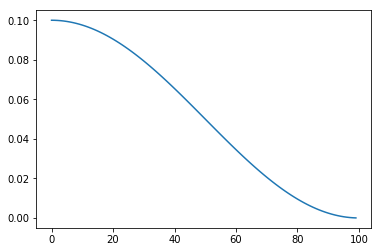

In [38]:
t = np.array(range(100), dtype=float)
t *= pi/100.
a = 0.05*(1.+np.cos(t))
plt.plot(a)

In [25]:
def lrate_schedule_fn(epoch):
    if epoch < 50:
        return 1e-3
    elif epoch < 100:
        return 5e-4
    elif epoch < 150:
        return 1e-4
    else:
        return 1e-5
    
# from math import pi, cos

# def lrate_schedule_fn(epoch):
#     return 0.05*(1.+cos(epoch*pi/100.))

lrate_scheduler = keras.callbacks.LearningRateScheduler(lrate_schedule_fn)

early_stopper = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=15, verbose=1, 
                                              mode='auto')

filepath = os.path.join(savedir_long, "dcase19.{epoch:02d}-{loss:.4f}-{val_loss:.4f}.hdf5")
# create_folder(os.path.dirname(filepath))                                                                         
model_saver = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             monitor='val_loss',
                                             verbose=0,
                                             save_best_only=False,
                                             save_weights_only=False,
                                             mode='auto',
                                             period=10)


In [26]:
history = model.fit_generator(
    generator=train_generator,
    epochs=150,
    steps_per_epoch=nb_steps_train,
    use_multiprocessing=True,
    validation_data=dev_generator,
    validation_steps=nb_steps_dev,
#    validation_freq=[1, 2, 10, 20, 30, 40, 50],
    workers=os.cpu_count()//2,
#    workers=1,
    callbacks = [lrate_scheduler, early_stopper, model_saver],
    initial_epoch=0,
    verbose=1
    )

Epoch 1/2
0 0.09997532801828658


/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


1/5 [=====>........................] - ETA: 54s - loss: 0.4599 - loc_output_loss: 0.0644 - at_output_loss: 0.3956

/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


3/5 [=================>............] - ETA: 26s - loss: 0.4872 - loc_output_loss: 0.0798 - at_output_loss: 0.4074

/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


4/5 [=======================>......] - ETA: 12s - loss: 0.4941 - loc_output_loss: 0.0822 - at_output_loss: 0.4120

/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


5/5 [==============================] - 62s 12s/step - loss: 0.4968 - loc_output_loss: 0.0844 - at_output_loss: 0.4125
Epoch 2/2
1 0.1


/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/keras/callbacks.py:526: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,loc_output_loss,at_output_loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


1/5 [=====>........................] - ETA: 26s - loss: 0.4954 - loc_output_loss: 0.0853 - at_output_loss: 0.4101

/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


3/5 [=================>............] - ETA: 19s - loss: 0.5217 - loc_output_loss: 0.1014 - at_output_loss: 0.4202

/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


4/5 [=======================>......] - ETA: 9s - loss: 0.5244 - loc_output_loss: 0.1014 - at_output_loss: 0.4230 

/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


5/5 [==============================] - 47s 9s/step - loss: 0.5322 - loc_output_loss: 0.1064 - at_output_loss: 0.4258


/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/keras/callbacks.py:526: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,loc_output_loss,at_output_loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [ ]:
plt.plot(model.history.history['loss'])
# plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

# Test model

## load a model

In [28]:
modeldir='models/models_train_synthetic/model0'
# # modelpath=modeldir + '/model_0_cnn_100_epochs_loss_0.196808_train_0.4117_val.h5'
# # modelpath=modeldir + '/dcase19.20-0.2485-0.3683.hdf5'
# modelpath=modeldir + '/dcase19.30-0.2178-0.3783.hdf5'
modelpath=modeldir + '/'

# modeldir='models/models_train_synthetic/model1'
# # modelpath=modeldir + '/dcase19.110-0.1804-0.3329.hdf5'
# # modelpath=modeldir + '/model_1_cnn_200_epochs_loss_0.179525_train_0.3320_val.h5'
# # modelpath=modeldir + '/dcase19.100-0.1890-0.3417.hdf5'
# modelpath=modeldir + '/dcase19.90-0.1949-0.3362.hdf5'

# modeldir='tmp/'
# modelpath=modeldir + 'model_1_cnn_200_epochs_loss_0.152185_train_0.3334_val.h5'

# 2018
# model1 = load_model('../dcase2018/thomas_models/classif_cnn_100epochs_f1_0.8584_valf1_0.8286.h5', 
#                             custom_objects={'f1': Metrics.f1, 'recall': Metrics.recall, 
#                                             'precision': Metrics.precision})
      
model = load_model(modelpath, custom_objects={'loc_loss': loc_loss})

# model.summary()

/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/keras/models.py:318: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [18]:
modeldir='models/'
modelpath=modeldir + '/case19.130-0.1475-0.3367.hdf5'

In [21]:
def define_model(at_layer_name='at_output', loc_layer_name='loc_output'):

    time_pooling_factor=1
    
    input_shape = (64, 431, 1)

    melInput = Input(input_shape)

    # ---- mel convolution part ----
    mBlock1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(melInput)
    mBlock1 = BatchNormalization()(mBlock1)
    mBlock1 = Activation(activation="relu")(mBlock1)
    mBlock1 = MaxPooling2D(pool_size=(4, 1))(mBlock1)
    # mBlock1 = Dropout(0.1)(mBlock1)
    mBlock1 = SpatialDropout2D(0.3, data_format=K.image_data_format())(mBlock1)

    mBlock2 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(mBlock1)
    mBlock2 = BatchNormalization()(mBlock2)
    mBlock2 = Activation(activation="relu")(mBlock2)
    mBlock2 = MaxPooling2D(pool_size=(4, time_pooling_factor))(mBlock2)
    mBlock2 = SpatialDropout2D(0.3, data_format=K.image_data_format())(mBlock2)
    # mBlock2 = Dropout(0.1)(mBlock2)

    mBlock3 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(mBlock2)
    mBlock3 = BatchNormalization()(mBlock3)
    mBlock3 = Activation(activation="relu")(mBlock3)
    mBlock3 = MaxPooling2D(pool_size=(4, time_pooling_factor))(mBlock3)
    mBlock3 = SpatialDropout2D(0.3, data_format=K.image_data_format())(mBlock3)
    # mBlock3 = Dropout(0.1)(mBlock3)

    targetShape = int(mBlock3.shape[1] * mBlock3.shape[2])
    mReshape = Reshape(target_shape=(targetShape, 64))(mBlock3)

    gru = Bidirectional(
        GRU(kernel_initializer='glorot_uniform', activation='tanh', recurrent_dropout=0.1, \
            dropout=0.1, units=64, return_sequences=True)
    )(mReshape)

    gru = Dropout(0.1)(gru)

    output = TimeDistributed(
        Dense(64, activation="relu"),
    )(gru)

    output = Dropout(0.1)(output)

    loc_output = TimeDistributed(
        Dense(10, activation="sigmoid"), name=loc_layer_name,
    )(output)

    # output = TimeDistributed(
    #  Lambda(lambda x: (x - K.min(x, axis=1, keepdims=True))/(K.max(x, axis=1, keepdims=True)- K.min(x, axis=1, keepdims=True)) ),
    # )(output)

    ### output = GlobalAveragePooling1D()(output)
    gap = GlobalAveragePooling1D()(loc_output)
    gmp = GlobalMaxPooling1D()(loc_output)
    # flat_gap = Flatten()(gap)
    # flat_gmp = Flatten()(gmp)

    concat = Concatenate()([gap, gmp])

    d = Dense(1024, activation="relu")(concat)
    d = Dropout(rate=0.5)(d)

    at_output = Dense(10, activation="sigmoid", name=at_layer_name)(d)

    model = Model(inputs=[melInput], outputs=[loc_output, at_output])
    
    return model
    

In [25]:
modeldir='models'

# weight_path=modeldir + '/models_train_synthetic/osirim_dcase19.130-0.1488-0.3204/dcase19.130-0.1488-0.3204_weights.h5'
weight_path=modeldir + '/models_train_synthetic/osirim_dcase19.90-0.1650-0.3258/dcase19.90-0.1650-0.3258.h5'
model1 = define_model(at_layer_name='at_output1', loc_layer_name='loc_output1')
model1.load_weights(weight_path)
# model1.summary()

weight_path=modeldir + '/models_train_synthetic/osirim_dcase19.90-0.1658-0.3292/dcase19.90-0.1658-0.3292.h5'
model2 = define_model(at_layer_name='at_output2', loc_layer_name='loc_output2')
model2.load_weights(weight_path)
# # model2.summary()

weight_path=modeldir + '/models_train_synthetic/osirim_dcase19.90-0.1652-0.3390/dcase19.90-0.1652-0.3390.h5'
model3 = define_model(at_layer_name='at_output3', loc_layer_name='loc_output3')
model3.load_weights(weight_path)


In [26]:
model1 = model2

## Dog Speech file

In [21]:
# audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/validation'
# fpath=audiodir + '/' + 'Y5J603SAj7QM_210.000_220.000.wav'

audiodir='/baie/corpus/DCASE2019/task4/dataset/audio/train/weak'
fpath=audiodir + '/' + 'Y-dDpGRPHzM0_30.000_40.000.wav'

signal, sr = librosa.load(fpath, res_type='kaiser_fast')

hop_length=512
#             # multiply by random factor for data aug
#             if self.fact_amp > 0:
#                 print('amp')
#                 signal *= rand_amp_arr[i]

power = librosa.feature.melspectrogram(y=signal,
                            sr=sr,
                            n_fft=2048, 
                            n_mels=64, 
                            fmin=0.0, 
                            fmax=sr/2.0, 
                            htk=False, 
                            hop_length=hop_length, 
                            power=2.0, 
                            norm=1)

power = librosa.core.power_to_db(power, ref=np.max)
endpoint_time = np.min([power.shape[1],431])

x_test = power[:,:endpoint_time]
x_test = x_test[np.newaxis, :, :, np.newaxis]
# x_test.shape # (1, 64, 431, 1)

loc_probs, at_probs = model1.predict(x_test)
loc_probs.shape, at_probs.shape

((1, 431, 10), (1, 10))

In [22]:
at_probs

array([[0.2486009 , 0.9894839 , 0.8405699 , 0.06382809, 0.00364721,
        0.07320789, 0.00572502, 0.00626068, 0.0015088 , 0.01239183]],
      dtype=float32)

Speech 0.9926207
1.0
Dog 0.8188091
1.0


/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


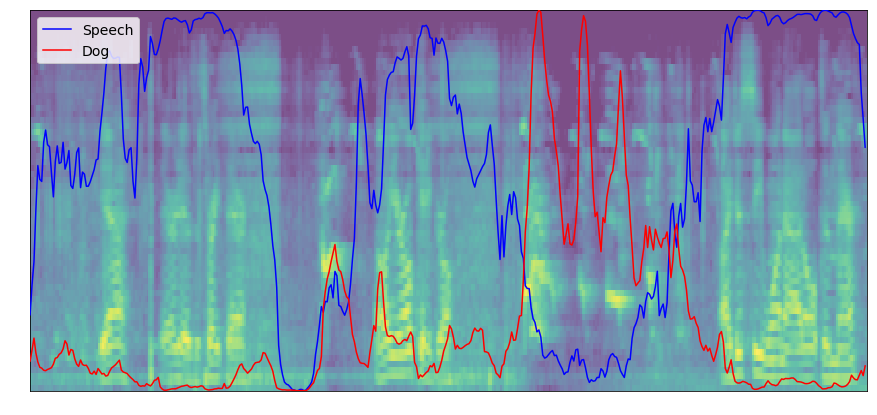

In [23]:
time_vector = np.linspace(0, 10, loc_probs.shape[1])

fig, axs = plt.subplots(1,1,figsize=(15,7))

### axs.imshow(featTest[indice][:,:,0] , cmap='gray', interpolation='none', alpha=0.3)
axs.imshow(x_test[0,:,:,0], origin='lower', interpolation='none', aspect='auto', alpha=0.7)

# enlever les ticks

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off


# # indice = 4
nplots=2
dico={0: 1, 1: 2}
dico_c={0: 'b', 1: 'r'}
dico_l={0: 'Speech', 1: 'Dog'}

# # indice = 15
# dico={0: 0, 1: 1}
# dico_c={0: 'b', 1: 'r'}
# dico_l={0: 'Alarm', 1: 'Speech'}

# classes = ['Speech', 'Dishes', 'Frying']
# dico={}
# dico_c={0: 'b', 1: 'r', 2: 'y'}
# dico_l={}
# for i,c in enumerate(classes):
#     n = DCASE2018.class_correspondance[c]
#     dico[i] = n
#     dico_l[i] = c

# dico={0: 3}
# dico_c={0: 'b'}
# dico_l={0: 'Cat'}

fig.canvas.draw()

box = axs._position.bounds
height = box[3] / nplots

for i in range(nplots):

    tmpax = fig.add_axes([box[0], box[1], box[2], box[3]])
    tmpax.set_axis_off()
    
    
    if False:
        proba= temporalPrediction[indice,:,dico[i]]
    else:
        proba = loc_probs[0,:,dico[i]]

    print(dico_l[i], np.max(proba))
###     proba = dico_toto['Y-dDpGRPHzM0_30.000_40.000'][i]
    proba = (proba - np.min(proba)) / (np.max(proba) - np.min(proba))
    print(np.max(proba))
    
#     concat = np.concatenate((time_vector[:,np.newaxis], proba[:,np.newaxis]), axis=-1)
#     np.savetxt('/home/thomas/research/demos/demo_dcase2018/{}_Y5J603SAj7QM_210.000_220.000.txt'.format(dico_l[i]), concat, fmt='%.3f')
    
    tmpax.plot(proba, dico_c[i], label=dico_l[i])
    tmpax.set_ylim(0, np.max(proba))
    tmpax.set_xlim(0, 431)
    plt.legend(loc=2, fontsize=14)


## Val subset

In [28]:
val_probs1 = model1.predict_generator(generator=dev_generator,
    steps=nb_steps_dev,
    use_multiprocessing=True,
    # workers=os.cpu_count(),
    workers=10,
    max_queue_size=10,
    verbose=1)

# val_probs2 = model2.predict_generator(generator=dev_generator,
#     steps=nb_steps_dev,
#     use_multiprocessing=True,
#     workers=os.cpu_count(),
#     workers=10,
#     max_queue_size=10,
#     verbose=1)

# val_probs3 = model3.predict_generator(generator=dev_generator,
#     steps=nb_steps_dev,
#     use_multiprocessing=True,
# #     workers=os.cpu_count(),
#     workers=10,
#     max_queue_size=10,
#     verbose=1)


18/18 [==============================] - 51s 3s/step


In [25]:
val_probs[0].shape, val_probs[1].shape

NameError: name 'val_probs' is not defined

In [29]:
nb_files=1122
# nb_files=1058

val_probs1[0] = val_probs1[0][:nb_files]
val_probs1[1] = val_probs1[1][:nb_files]

# val_probs2[0] = val_probs2[0][:nb_files]
# val_probs2[1] = val_probs2[1][:nb_files]

# val_probs3[0] = val_probs3[0][:nb_files]
# val_probs3[1] = val_probs3[1][:nb_files]


val_probs1[0].shape, val_probs1[1].shape

((1122, 431, 10), (1122, 10))

In [101]:
np.save(modeldir + '/models_train_synthetic/osirim_dcase19.90-0.1650-0.3258/AT_probs.npy', val_probs1[1], allow_pickle=True)
np.save(modeldir + '/models_train_synthetic/osirim_dcase19.90-0.1658-0.3292/AT_probs.npy', val_probs2[1], allow_pickle=True)
np.save(modeldir + '/models_train_synthetic/osirim_dcase19.90-0.1652-0.3390/AT_probs.npy', val_probs3[1], allow_pickle=True)

In [74]:
np.save(modeldir + '/models_train_synthetic/osirim_dcase19.90-0.1650-0.3258/STRONG_probs.npy', val_probs1[0], allow_pickle=True)
np.save(modeldir + '/models_train_synthetic/osirim_dcase19.90-0.1658-0.3292/STRONG_probs.npy', val_probs2[0], allow_pickle=True)
np.save(modeldir + '/models_train_synthetic/osirim_dcase19.90-0.1652-0.3390/STRONG_probs.npy', val_probs3[0], allow_pickle=True)

In [45]:
# losses = model.evaluate_generator(generator=dev_generator)
# losses
# [0.3701458238065243, 0.16670954041182995, 0.20343628618866205]

In [30]:
def prec_at_from_probs(at_probs, at_gt_dict, file_lst):
    all_y_true = []
    all_y_pred = []
    total_num_true_pos_preds = 0
    total_num_true_pos_gt = 0
    for i, file_id in enumerate(file_lst):
        y_true = at_gt_dict[file_id]
        y_probs = at_probs[i]
        y_preds = 1*(y_probs>0.5)
        all_y_true.append(y_true)
        all_y_pred.append(y_preds)
        if i<-1:
            print(i, file_id)
            print(y_true)
            print(y_probs)
            print(y_preds)
        num_true_pos_preds = sum(y_true * y_preds)
        num_true_pos_gt = sum(y_true)
        total_num_true_pos_preds += num_true_pos_preds
        total_num_true_pos_gt += num_true_pos_gt
    if total_num_true_pos_gt > 0 :
        return np.array(all_y_true), np.array(all_y_pred), 100.*total_num_true_pos_preds/total_num_true_pos_gt
    else:
        return np.array(all_y_true), np.array(all_y_pred), 0.

    
def score_per_class(all_y_true, all_y_pred):
    from sklearn.metrics import precision_recall_fscore_support
    all_y_true = np.array(all_y_true)
    all_y_pred = np.array(all_y_pred)
    nb_classes = len(all_y_true[0])
    for cl in range(nb_classes):
        class_true = all_y_true[:,cl]
        class_pred = all_y_pred[:,cl]
        p, r, fscore, support = precision_recall_fscore_support(class_true, class_pred, average='binary', pos_label=1)
        print('%s %.2f %.2f %.2f'%(class_correspondance_reverse[cl], 100*p, 100*r, 100*fscore))


In [31]:
all_y_true, all_y_pred1, prec = prec_at_from_probs(val_probs1[1], dico_tags_y_validation, wav_lst_validation)

# _, all_y_pred2, prec = accuracy_at_from_probs(val_probs2[1], dico_tags_y_validation, wav_lst_validation)

# all_y_true, all_y_pred3, prec = accuracy_at_from_probs(val_probs3[1], dico_tags_y_validation, wav_lst_validation)

In [32]:
# 73.229
'%.3f'%prec

'72.009'

In [33]:
from sklearn.metrics import precision_recall_fscore_support

p1, r1, fscore1, support = precision_recall_fscore_support(all_y_true, all_y_pred1, average='macro')
acc1 = accuracy_score(all_y_true, all_y_pred1)

# p2, r2, fscore2, support = precision_recall_fscore_support(all_y_true, all_y_pred2, average='macro')
# acc2 = accuracy_score(all_y_true, all_y_pred2)

# p3, r3, fscore3, support = precision_recall_fscore_support(all_y_true, all_y_pred3, average='macro')
# acc3 = accuracy_score(all_y_true, all_y_pred3)

print('%.2f %.2f %.2f %.2f'%(100.*p1, 100.*r1, 100.*fscore1, 100.*acc1))
# print('%.2f %.2f %.2f %.2f'%(100.*p2, 100.*r2, 100.*fscore2, 100.*acc2))
# print('%.2f %.2f %.2f %.2f'%(100.*p3, 100.*r3, 100.*fscore3, 100.*acc3))

70.16 66.34 67.29 51.52


In [62]:
tmp_probs = np.empty((nb_files, 10, 3))

tmp_probs[:, :, 0] = val_probs1[1]
tmp_probs[:, :, 1] = val_probs2[1]
tmp_probs[:, :, 2] = val_probs3[1]

mean_probs = np.mean(tmp_probs, axis=-1)
mean_probs.shape, all_y_true.shape

((1122, 10), (1122, 10))

In [34]:
_, all_y_pred4, prec = accuracy_at_from_probs(mean_probs, dico_tags_y_validation, wav_lst_validation)
p4, r4, fscore4, support = precision_recall_fscore_support(all_y_true, all_y_pred4, average='macro')
acc4 = accuracy_score(all_y_true, all_y_pred4)

print('%.2f %.2f %.2f %.2f'%(100.*p4, 100.*r4, 100.*fscore4, 100.*acc4))

NameError: name 'mean_probs' is not defined

In [66]:
wav_lst_validation_leo[0], val_probs[1][0], wav_lst_validation.index(wav_lst_validation_leo[0])

('Y--4gqARaEJE_0.000_10.000.wav',
 array([2.0661277e-05, 4.8262820e-02, 1.6945174e-02, 1.2245452e-03,
        9.6007508e-01, 1.2714860e-04, 2.6312014e-04, 3.4169962e-03,
        1.9439520e-02, 8.8697627e-05], dtype=float32),
 1068)

In [67]:
val_probs[1][1068]

array([5.7336605e-01, 6.2213284e-03, 2.3222724e-01, 3.9305899e-01,
       1.1606478e-07, 2.1931173e-04, 5.2775920e-07, 4.5570076e-07,
       4.4928100e-07, 7.7136763e-05], dtype=float32)

In [68]:
score_per_class(all_y_true, all_y_pred)

Alarm_bell_ringing 87.50 79.03 83.05
Speech 96.48 86.98 91.48
Dog 63.10 73.75 68.01
Cat 67.83 65.00 66.38
Vacuum_cleaner 61.74 78.02 68.93
Dishes 63.41 54.17 58.43
Frying 52.03 74.42 61.24
Electric_shaver_toothbrush 64.44 46.77 54.21
Blender 61.76 52.50 56.76
Running_water 81.41 65.46 72.57


In [29]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(all_y_true, all_y_pred)
# ValueError: multiclass-multioutput is not supported

In [30]:
# !conda list

In [55]:
score_per_class(all_y_true, all_y_pred)

Alarm_bell_ringing 90.26 74.73 81.76
Speech 95.65 88.15 91.75
Dog 63.78 73.75 68.41
Cat 66.39 67.50 66.94
Vacuum_cleaner 65.22 82.42 72.82
Dishes 63.12 61.81 62.46
Frying 50.78 75.58 60.75
Electric_shaver_toothbrush 66.00 53.23 58.93
Blender 56.76 52.50 54.55
Running_water 78.99 56.19 65.66


In [36]:
import sklearn as sk
def simulated(y_true, y_pred):
    bin_y_pred = y_pred.copy()
    bin_y_pred[bin_y_pred > 0.5] = 1
    bin_y_pred[bin_y_pred <= 0.5] = 0

    sk_f1 = np.asarray( sk.metrics.f1_score(bin_y_pred, y_true, average=None) )

    macro_iteration = 80
    micro_interation = 400

    history = {
        "best_f1": [[] for _ in range(10)],
        "f1": []
    }

    best_thresholds = [0.5] * 10
    best_f1 = sk_f1.copy()

    progress = tqdm.tqdm_notebook(total = macro_iteration * micro_interation)
    for M in range(macro_iteration):
        thresholds = [0.5] * 10
        delta_ratio = 0.2
        delta_decay = 1e-4

        for m in range(micro_interation):
            bin_y_pred = y_pred.copy()

            # calc new threhsold
            r = np.array([np.random.normal(t, 0.6) for t in thresholds])
            delta = r * delta_ratio
            new_thresholds = thresholds + delta
            delta_ratio -= delta_decay


            # apply threshold
            bin_y_pred[bin_y_pred > new_thresholds] = 1
            bin_y_pred[bin_y_pred <= new_thresholds] = 0

            # calc new f1
            new_f1 = sk.metrics.f1_score(bin_y_pred, y_true, average=None)
            history["f1"].append(new_f1)

            # check
            for i in range(10):
                if new_f1[i] > best_f1[i]:
                    print(new_f1[i], " > ", best_f1[i])
                    best_f1[i] = new_f1[i]
                    best_thresholds[i] = new_thresholds[i]
                    thresholds[i] = best_thresholds[i]
                    history["best_f1"][i].append(best_f1[i])

            progress.update()
    return sk_f1, best_f1, best_thresholds, history

# sk_f1, best_f1, best_threshold, history = simulated(all_y_true, mean_probs)
sk_f1, best_f1, best_threshold, history = simulated(np.array(all_y_true), val_probs1[1])

0.6733333333333333  >  0.6521739130434783
0.6831683168316832  >  0.6829268292682926
0.5522388059701493  >  0.5285714285714286
0.6808510638297871  >  0.6733333333333333
0.6583333333333333  >  0.6370967741935485
0.6941176470588236  >  0.6831683168316832
0.625  >  0.6216216216216215
0.6194690265486725  >  0.6111111111111109
0.81524926686217  >  0.8119402985074627
0.5896414342629482  >  0.5890909090909091
0.6951871657754011  >  0.6941176470588236
0.8154761904761905  >  0.81524926686217
0.9109947643979057  >  0.9063604240282686
0.6638655462184875  >  0.6583333333333333
0.7  >  0.6882352941176471
0.9116360454943132  >  0.9109947643979057
0.6813186813186813  >  0.6808510638297871
0.7040816326530613  >  0.7
0.7046070460704608  >  0.7040816326530613
0.5962264150943397  >  0.5896414342629482
0.7052896725440806  >  0.7046070460704608
0.8163265306122449  >  0.8154761904761905
0.911944202266783  >  0.9116360454943132
0.9156010230179028  >  0.911944202266783
0.7111111111111111  >  0.7052896725440806

/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.838526912181303  >  0.8379888268156425
0.6982248520710059  >  0.6976744186046511
0.839572192513369  >  0.838526912181303
0.8404255319148937  >  0.839572192513369
0.5584415584415584  >  0.5522388059701493
0.5591397849462365  >  0.5584415584415584
0.5671641791044777  >  0.5591397849462365
0.5728643216080402  >  0.5671641791044777
0.6114649681528662  >  0.6098360655737706
0.5786802030456852  >  0.5728643216080402


In [37]:
best_f1

array([0.84042553, 0.91645134, 0.68131868, 0.67811159, 0.69822485,
       0.61146497, 0.625     , 0.64661654, 0.5786802 , 0.71111111])

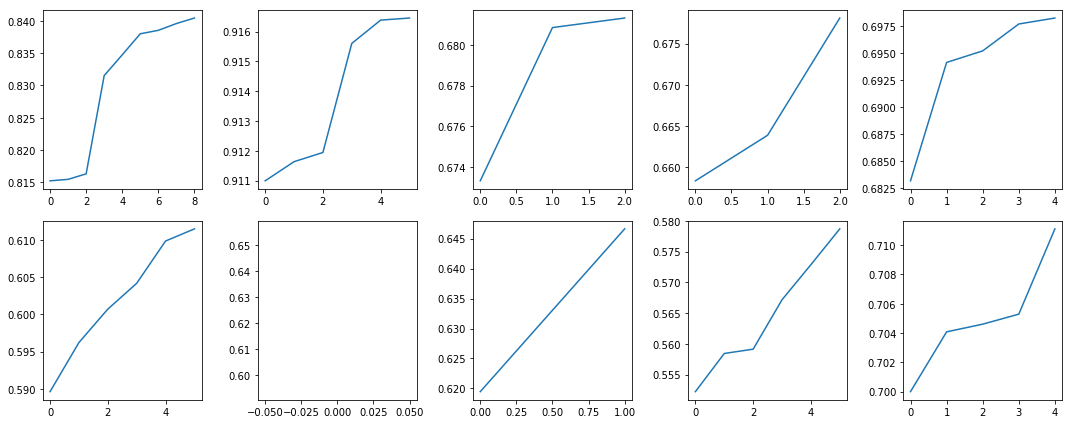

In [38]:
import matplotlib.pyplot as plt

history_f1 = np.asarray(history["best_f1"])
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.plot(history_f1[i])
plt.tight_layout()
plt.show()

In [39]:
X_val_pred_1_bin = val_probs1[1].copy()
# X_val_pred_1_bin = val_probs.copy()
# X_val_pred_1_bin = mean_probs.copy()

X_val_pred_1_bin[X_val_pred_1_bin > best_threshold] = 1
X_val_pred_1_bin[X_val_pred_1_bin <= best_threshold] = 0

In [40]:
p, r, fscore, support = precision_recall_fscore_support(all_y_true, X_val_pred_1_bin, average='macro')
acc = accuracy_score(all_y_true, X_val_pred_1_bin)
'%.2f %.2f %.2f %.2f'%(100*acc, 100*p, 100*r, 100*fscore)

'54.28 69.04 72.54 69.87'

In [41]:
score_per_class(all_y_true, X_val_pred_1_bin)

Alarm_bell_ringing 83.16 84.95 84.04
Speech 94.66 88.81 91.65
Dog 82.30 58.13 68.13
Cat 69.91 65.83 67.81
Vacuum_cleaner 75.64 64.84 69.82
Dishes 56.47 66.67 61.15
Frying 50.72 81.40 62.50
Electric_shaver_toothbrush 60.56 69.35 64.66
Blender 48.72 71.25 57.87
Running_water 68.25 74.23 71.11


In [75]:
all_y_true, all_y_pred, acc = accuracy_at_from_probs(
    X_val_pred_1_bin,
    dico_tags_y_validation, 
    wav_lst_validation
)

In [114]:
acc

77.11962833914053

In [54]:
dico_at_best_thresholds = {}
for i in range(10):
    dico_at_best_thresholds[class_correspondance_reverse[i]] = best_threshold[i]

In [55]:
dico_at_best_thresholds

{'Alarm_bell_ringing': 0.1214675778846487,
 'Speech': 0.2865209624836408,
 'Dog': 0.7976113837982772,
 'Cat': 0.6562882131426222,
 'Vacuum_cleaner': 0.7229904131716726,
 'Dishes': 0.3742572346545957,
 'Frying': 0.4880301959960084,
 'Electric_shaver_toothbrush': 0.23809283061772726,
 'Blender': 0.2356516053912887,
 'Running_water': 0.21600981881417408}

In [56]:
# pickle.dump(dico_at_best_thresholds, open('models/models_train_synthetic/osirim_dcase19.90-0.1650-0.3258/AT_thresholds.pkl', "wb"))
pickle.dump(dico_at_best_thresholds, open('models/models_train_synthetic/osirim_dcase19.90-0.1658-0.3292/AT_thresholds.pkl', "wb"))



# Localization

In [42]:
def rescale(array_1d, border_index=0):
    """rescale between 0 and 1 a 1d-array"""
#     border_index = 3
    if border_index > 0:
        return (array_1d - np.min(array_1d[border_index:-border_index])) / (np.max(array_1d[border_index:-border_index]) - np.min(array_1d[border_index:-border_index]))
    else:
        return (array_1d - np.min(array_1d)) / (np.max(array_1d) - np.min(array_1d))
        
    
def get_prob_curves_for_predicted_classes(audio_tag_probs, strong_probs, featTestList, int2className):
    
    audio_tag_preds = 1*(audio_tag_probs>0.5)
    
    dico_prob_curves_for_predicted_classes = {}
    for i, fileid in enumerate(featTestList):
        dico_prob_curves_for_predicted_classes[fileid] = {}
        current_classes = np.nonzero(audio_tag_preds[i])[0]
        for j in range(current_classes.shape[0]):
            class_name = int2className[current_classes[j]]
            dico_prob_curves_for_predicted_classes[fileid][class_name] = rescale(strong_probs[i,:,current_classes[j]], border_index=0)
#             dico_prob_curves_for_predicted_classes[fileid_short][class_name] = strong_probs[i,:,current_classes[j]]
    
    return dico_prob_curves_for_predicted_classes


In [77]:
print('without opti')
dico_prob_curves = get_prob_curves_for_predicted_classes(val_probs1[1], 
                                                         val_probs1[0], 
                                                         wav_lst_validation, 
                                                         class_correspondance_reverse)

In [43]:
print('with opti')
dico_prob_curves = get_prob_curves_for_predicted_classes(X_val_pred_1_bin, 
                                                         val_probs1[0], 
                                                         wav_lst_validation, 
                                                         class_correspondance_reverse)

with opti


In [79]:
print('AT oracle !!')
dico_prob_curves = get_prob_curves_for_predicted_classes(gt_tags_y_validation, 
                                                        val_probs[0],
                                                        wav_lst_validation, 
                                                        class_correspondance_reverse)

AT oracle !!


In [82]:
len(dico_prob_curves)

1122

In [83]:
gt_tags_y_validation[5], wav_lst_validation[:5], sum(sum(1*(gt_tags_y_validation>0.5)))

(array([1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 ['Y00pbt6aJV8Y_350.000_360.000.wav',
  'Y00pK0GMmE9s_70.000_80.000.wav',
  'Y02sD1KJeoGA_50.000_60.000.wav',
  'Y0bjUq9XMMmQ_30.000_40.000.wav',
  'Y0cH_NlhhMAs_30.000_40.000.wav'],
 1722)

In [84]:
wav_lst_validation.index('Y0eh_N-cmcuI_350.000_360.000.wav'), dico_prob_curves['Y00pbt6aJV8Y_350.000_360.000.wav']['Vacuum_cleaner'].shape

(5, (431,))

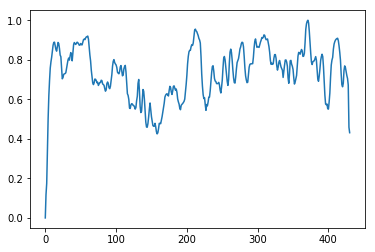

In [45]:
plt.plot(dico_prob_curves['Y00pbt6aJV8Y_350.000_360.000.wav']['Vacuum_cleaner'])


In [44]:
def from_strong_probs_dict_2_strong_probs_3d_array(dico_prob_curves_for_predicted_classes, wav_lst_validation):

    nbFrame = 431
    out_dim = 10

    # rearange list of results
    results = np.zeros((len(wav_lst_validation), nbFrame, out_dim))

    for i, f in enumerate(wav_lst_validation):
        dico_strong_probs = dico_prob_curves_for_predicted_classes[f]
        curves = np.zeros((nbFrame, out_dim))
        
        for event, prob in dico_strong_probs.items():
            curves[:,class_correspondance[event]] = prob

        results[i] = curves
    return results

strong_probs_3d_array = from_strong_probs_dict_2_strong_probs_3d_array(dico_prob_curves, wav_lst_validation)
strong_probs_3d_array.shape


(1122, 431, 10)

In [87]:
# def from_gt_strong_dict_2_gt_strong_3d_array(dico_strong_y_validation, wav_lst_validation):

#     nbFrame = 431
#     out_dim = 10

#     # rearange list of results
#     results = np.zeros((len(wav_lst_validation), nbFrame, out_dim))

#     for i, f in enumerate(wav_lst_validation):
#         results[i] = dico_strong_y_validation[f]

#     return results


# strong_gt_3d_array = from_gt_strong_dict_2_gt_strong_3d_array(dico_strong_y_validation, wav_lst_validation)
# strong_gt_3d_array.shape

In [45]:
def load_test_strong_ground_truth(fpath):
    # test ground truth
    with open(fpath, "r") as f:
        str_strong_y_true = f.read().splitlines()[1:]
    
    to_be_removed = []
    for el in str_strong_y_true:
        info = el.split("\t")
        if info[1] == '':
            to_be_removed.append(el)
    return [el for el in str_strong_y_true if el not in to_be_removed] 

gt_fpath = '/baie/corpus/DCASE2019/task4/dataset/metadata/validation/validation.csv'
str_strong_y_true = load_test_strong_ground_truth(gt_fpath)
# str_strong_y_true

In [46]:
# for el in str_strong_y_true:
#     info = el.split("\t")
#     print(info)
#     print(float(info[1]))

In [47]:
from sed_tool.optimizers import DichotomicOptimizer
from sed_tool.Encoder import Encoder
# from sed_tool.sed_tools import event_based_evaluation
from sed_tool.sed_tools import eb_evaluator, sb_evaluator

import dcase_util as dcu

## Global opti

In [32]:
# Find best hysteresis threshold parameters
def eval_hysteresis(test_strong_y_true, time_prediction, name_list, low = (0.001, 0.09), high = (0.001, 0.09),
                   step=5, recurse=10):
    """Find best hysteresis threshold parameters.
    
    :param test_strong_y_true: GT strong annotations
    :param time_prediction: The time prediction that will be converted into segments and evaluate
    :param name_list: The list of file names (must be in the same order than time_prediction)
    :param low: The search boundaries for the "low" parameter (low -> bottom threshold)
    :param high: the search boundaries for the "high" parameter (high -> top threshold)
    :param nb_digit: The threshold max precision
    :param step: The number of value that will be test in between the boudaries (for each parameters)
    :param recurse: The number of time the search will be done (each time in between the two best boundaries of the previous execution)
    :param monitor: The metrics to focus on for comparing the results of each parameters combination.
    """
    
    class_list = ['Alarm_bell_ringing', 'Speech', 'Dog', 'Cat', 'Vacuum_cleaner', 'Dishes', 'Frying', 'Electric_shaver_toothbrush', 'Blender', 'Running_water']

    # Create the encoder that will be used
    encoder = Encoder(
        classes=class_list,
        temporal_precision = 200,  # ms
        clip_length = 10,          # s
        minimal_segment_step = 200 # ms
    )

    optimizer = DichotomicOptimizer(
        {
            "low": low,
            "high": high,
            "smooth": "smoothMovingAvg",
            "window_len": (5, 27) # [19]
        },

        encoder = encoder,
        step = step,
        nb_recurse = recurse,
        nb_process = 8
    )

    # Perform the optimization ON TEST
    optimizer.fit(
        y_true=test_strong_y_true,
        y_pred=time_prediction,
        filenames=name_list,
        method="hysteresis",
        verbose=2
    )

    return optimizer



In [96]:
# optimizer = eval_hysteresis(strong_gt_3d_array, strong_probs_3d_array, wav_lst_validation)

# best_params, score = optimizer.best

# print('best params', best_params)
# print('score', score)
# eb_evaluator()

In [ ]:
def apply_hysteresis(best_params, str_strong_y_true, strong_prediction, filenames):

    class_list = ['Alarm_bell_ringing', 'Speech', 'Dog', 'Cat', 'Vacuum_cleaner', 'Dishes', 'Frying', 'Electric_shaver_toothbrush', 'Blender', 'Running_water']

    # Create the encoder that will be used
    encoder = Encoder(
        classes=class_list,
        temporal_precision = 200,  # ms
        clip_length = 10,          # s
        minimal_segment_step = 200 # ms
    )

    segments = encoder.encode(
        strong_prediction,
        method="hysteresis",
        **best_params
    )

    to_evaluate = encoder.parse(segments, filenames)
#     print(type(to_evaluate))

    event_results = eb_evaluator(str_strong_y_true, to_evaluate)
    av_scores = event_results.results_class_wise_average_metrics()['f_measure']
    print('p: %.2f r: %.2f f: %.2f\n'%(100.*av_scores['precision'], 100.*av_scores['recall'], 100.*av_scores['f_measure']))
#     print(event_results)

#     sb_results = sb_evaluator(str_strong_y_true, to_evaluate, time_resolution=1.)
#     print(sb_results)


In [ ]:
# best_params = {'low': 0.1, 'high': 0.3, 'window_len': 10., 'smooth': 'smoothMovingAvg'}
best_params, score = optimizer.best
apply_hysteresis(best_params, str_strong_y_true, strong_probs_3d_array, wav_lst_validation)


In [83]:
# Find best hysteresis threshold parameters
def opti_absolute_threshold(test_strong_y_true, time_prediction, name_list, threshold=(0.1, 0.9),
                   step=5, recurse=10):
    """Find best abs threshold parameters.
    
    :param test_strong_y_true: GT strong annotations
    :param time_prediction: The time prediction that will be converted into segments and evaluate
    :param name_list: The list of file names (must be in the same order than time_prediction)
    :param nb_digit: The threshold max precision
    :param step: The number of value that will be test in between the boudaries (for each parameters)
    :param recurse: The number of time the search will be done (each time in between the two best boundaries of the previous execution)
    :param monitor: The metrics to focus on for comparing the results of each parameters combination.
    """
    
    class_list = ['Alarm_bell_ringing', 'Speech', 'Dog', 'Cat', 'Vacuum_cleaner', 'Dishes', 'Frying', 'Electric_shaver_toothbrush', 'Blender', 'Running_water']

    # Create the encoder that will be used
    encoder = Encoder(
        classes=class_list,
        temporal_precision = 200,  # ms
        clip_length = 10,          # s
        minimal_segment_step = 200 # ms
    )

    optimizer = DichotomicOptimizer(
        {
            "threshold": threshold,
            "smooth": "smoothMovingAvg",
            "window_len": (5, 27) # [19]
        },

        encoder = encoder,
        step = step,
        nb_recurse = recurse,
        nb_process = 8
    )

    # Perform the optimization ON TEST
    optimizer.fit(
        y_true=test_strong_y_true,
        y_pred=time_prediction,
        filenames=name_list,
        method="threshold",
        verbose=2
    )

    return optimizer



In [84]:
optimizer = opti_absolute_threshold(str_strong_y_true, strong_probs_3d_array, wav_lst_validation)

after :  {'threshold': (0.1, 0.6000000000000001), 'smooth': 'smoothMovingAvg', 'window_len': (5, 21.0)}
after :  {'threshold': (0.11250000000000002, 0.3375), 'smooth': 'smoothMovingAvg', 'window_len': (6.5, 19.5)}
after :  {'threshold': (0.15000000000000002, 0.30000000000000004), 'smooth': 'smoothMovingAvg', 'window_len': (10.833333333333332, 21.666666666666668)}
after :  {'threshold': (0.16875, 0.28125000000000006), 'smooth': 'smoothMovingAvg', 'window_len': (12.1875, 20.3125)}
after :  {'threshold': (0.18000000000000002, 0.27), 'smooth': 'smoothMovingAvg', 'window_len': (13.0, 19.5)}


Process ForkPoolWorker-126:
Process ForkPoolWorker-127:
Process ForkPoolWorker-123:
Process ForkPoolWorker-125:
Process ForkPoolWorker-124:
Process ForkPoolWorker-121:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/l

KeyboardInterrupt: 

  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/sed_tool/optimizers.py", line 53, in evaluate
    percentage_of_length=encoder.percentage_of_length
  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/sed_tool/sed_tools.py", line 46, in eb_evaluator
    t_collar, percentage_of_length)
  File "/home/thomas/tools/miniconda2/envs/keras-sincnet-env/lib/python3.6/site-packages/sed_tool/sed_tools.py", line 97, in event_based_evaluation
    estimated_even

In [101]:
def apply_absolute_threshold(best_params, str_strong_y_true, strong_prediction, filenames):

    class_list = ['Alarm_bell_ringing', 'Speech', 'Dog', 'Cat', 'Vacuum_cleaner', 'Dishes', 'Frying', 'Electric_shaver_toothbrush', 'Blender', 'Running_water']

    # Create the encoder that will be used
    encoder = Encoder(
        classes=class_list,
        temporal_precision = 200,  # ms
        clip_length = 10,          # s
        minimal_segment_step = 200 # ms
    )

    segments = encoder.encode(
        strong_prediction,
        method="threshold",
        **best_params
    )

    to_evaluate = encoder.parse(segments, filenames)
#     print(type(to_evaluate))
    event_results = eb_evaluator(str_strong_y_true, to_evaluate)

    # log_output_fh.write(str(event_results))

    # sb_results = sb_evaluator(str_strong_y_true, to_evaluate, time_resolution=1.)
    # log_output_fh.write(str(sb_results))

    macro_scores = event_results.results_class_wise_average_metrics()['f_measure']
    # log_output_fh.write(str(event_results))
    print('p: %.2f r: %.2f f: %.2f\n'%(100.*macro_scores['precision'], 100.*macro_scores['recall'], 100.*macro_scores['f_measure']))

    sb_results = sb_evaluator(str_strong_y_true, to_evaluate, time_resolution=1.)
    # log_output_fh.write(str(sb_results))
    macro_scores = sb_results.results_class_wise_average_metrics()['f_measure']
    print('p: %.2f r: %.2f f: %.2f\n'%(100.*macro_scores['precision'], 100.*macro_scores['recall'], 100.*macro_scores['f_measure']))



In [102]:
best_params_absolute, score = optimizer.best
apply_absolute_threshold(best_params_absolute, str_strong_y_true, strong_probs_3d_array, wav_lst_validation)
# p: 26.52 r: 29.35 f: 26.72
# p: 66.63 r: 62.76 f: 64.08
# avec opti AT, 74.042
# p: 25.94 r: 29.84 f: 26.87
# p: 68.17 r: 65.92 f: 66.78


p: 25.94 r: 29.84 f: 26.87

p: 68.17 r: 65.92 f: 66.78



## class-wise opti

In [48]:
def class_wise_optimization(optimizer, class_to_monitor, strong_y_true, strong_pred, filenames, method="threshold"):
    class_wise_results = {}
    
    for cl in class_to_monitor:
        optimizer.fit(
            strong_y_true, strong_pred, filenames,
            monitor=["class_wise", cl, "f_measure", "f_measure"],
            method=method,
            verbose=2)
        
        parameters, score = optimizer.best
        print(cl, parameters, score)
        class_wise_results[cl] = (parameters, score)
        
    return class_wise_results


def get_class_dependant_parameters(class_wise_results, class_list):
    class_dependant_parameters = {}
    for cl in class_list:
        for param in class_wise_results[cl][0]:
            if param not in class_dependant_parameters.keys():
                class_dependant_parameters[param] = []
            class_dependant_parameters[param].append(class_wise_results[cl][0][param])
            
    # TODO find better way
    # for "smooth" common parameters, remove list
    class_dependant_parameters["smooth"] = class_dependant_parameters["smooth"][0]
    return class_dependant_parameters

In [49]:
class_list = ['Alarm_bell_ringing', 'Speech', 'Dog', 'Cat', 'Vacuum_cleaner', 'Dishes', 'Frying', 'Electric_shaver_toothbrush', 'Blender', 'Running_water']

# Create the encoder that will be used
encoder = Encoder(
    classes=class_list,
    temporal_precision = 200,  # ms
    clip_length = 10,          # s
    minimal_segment_step = 200 # ms
)

### absolute threshold

In [ ]:
# Perform the optimization ON TEST
# Create the optimizer
optimizer = DichotomicOptimizer(
    {
        "threshold": (0.01, 0.99),
        "smooth": "smoothMovingAvg",
        "window_len": (3, 27)
    },
    
    encoder = encoder,
    step = 6,
    nb_recurse = 8,
    nb_process = 20
)

class_wise_results = class_wise_optimization(
    optimizer,
    class_list,
    method="threshold",
    strong_y_true=str_strong_y_true,
    strong_pred=strong_probs_3d_array,
    filenames=wav_lst_validation
)

In [ ]:
# check test
best_parameters = get_class_dependant_parameters(class_wise_results, class_list)

segments = encoder.encode(
    strong_probs_3d_array,
    method="threshold",
    **best_parameters
)
to_evaluate = encoder.parse(segments, wav_lst_validation)
evaluator = eb_evaluator(str_strong_y_true, to_evaluate)
print(evaluator)

In [ ]:
sb_evaluator = sb_evaluator(str_strong_y_true, to_evaluate, time_resolution=1.0)
print(sb_evaluator)

### hysteresis

In [50]:
# Perform the optimization ON TEST
# Create the optimizer
optimizer = DichotomicOptimizer(
    {
        "high": (0.01, 0.99),
        "low": (0.01, 0.99),
        "smooth": "smoothMovingAvg",
        "window_len": (3, 27)
    },
    
    encoder = encoder,
    step = 6,
    nb_recurse = 8,
    nb_process = 24
)

class_wise_results = class_wise_optimization(
    optimizer,
    class_list,
    method="hysteresis",
    strong_y_true=str_strong_y_true,
    strong_pred=strong_probs_3d_array,
    filenames=wav_lst_validation
)

after :  {'high': (0.01, 0.804), 'low': (0.01, 0.41200000000000003), 'smooth': 'smoothMovingAvg', 'window_len': (3, 15.6)}
after :  {'high': (0.2432, 0.7296), 'low': (0.0854, 0.2562), 'smooth': 'smoothMovingAvg', 'window_len': (3, 8.28)}
after :  {'high': (0.3566933333333333, 0.7133866666666666), 'low': (0.14802666666666664, 0.29605333333333334), 'smooth': 'smoothMovingAvg', 'window_len': (5.52, 11.04)}
after :  {'high': (0.37452799999999997, 0.6242133333333333), 'low': (0.155428, 0.25904666666666665), 'smooth': 'smoothMovingAvg', 'window_len': (6.623999999999999, 11.04)}
after :  {'high': (0.41947136, 0.62920704), 'low': (0.17407936, 0.26111903999999997), 'smooth': 'smoothMovingAvg', 'window_len': (6.71232, 10.06848)}
after :  {'high': (0.4544273066666667, 0.6361982293333334), 'low': (0.18858597333333332, 0.2640203626666666), 'smooth': 'smoothMovingAvg', 'window_len': (7.27168, 10.180352)}
after :  {'high': (0.4518305792000001, 0.6024407722666668), 'low': (0.18750833919999998, 0.25001

after :  {'high': (0.01, 0.99), 'low': (0.01, 0.99), 'smooth': 'smoothMovingAvg', 'window_len': (3, 25.2)}
after :  {'high': (0.29900000000000004, 0.8970000000000001), 'low': (0.495, 0.99), 'smooth': 'smoothMovingAvg', 'window_len': (5.9399999999999995, 17.82)}
after :  {'high': (0.3588, 0.7176), 'low': (0.6599999999999999, 0.99), 'smooth': 'smoothMovingAvg', 'window_len': (8.712, 17.424000000000003)}
after :  {'high': (0.43056000000000005, 0.7176), 'low': (0.7424999999999999, 0.99), 'smooth': 'smoothMovingAvg', 'window_len': (10.454400000000001, 17.424000000000003)}
after :  {'high': (0.43630080000000004, 0.6544512000000001), 'low': (0.792, 0.99), 'smooth': 'smoothMovingAvg', 'window_len': (10.593792000000002, 15.890688000000003)}
after :  {'high': (0.47265920000000006, 0.6617228800000001), 'low': (0.825, 0.99), 'smooth': 'smoothMovingAvg', 'window_len': (9.710976000000002, 13.595366400000003)}
after :  {'high': (0.46995829028571434, 0.6266110537142858), 'low': (0.8485714285714285, 0.

after :  {'high': (0.01, 0.99), 'low': (0.01, 0.99), 'smooth': 'smoothMovingAvg', 'window_len': (3, 25.2)}
after :  {'high': (0.29900000000000004, 0.8970000000000001), 'low': (0.495, 0.99), 'smooth': 'smoothMovingAvg', 'window_len': (5.9399999999999995, 17.82)}
after :  {'high': (0.43853333333333333, 0.8770666666666668), 'low': (0.396, 0.7919999999999999), 'smooth': 'smoothMovingAvg', 'window_len': (7.128, 14.256)}
after :  {'high': (0.39468000000000003, 0.6578), 'low': (0.594, 0.9899999999999999), 'smooth': 'smoothMovingAvg', 'window_len': (10.692, 17.82)}
after :  {'high': (0.52624, 0.7893600000000001), 'low': (0.47519999999999996, 0.7128), 'smooth': 'smoothMovingAvg', 'window_len': (8.5536, 12.830400000000001)}
after :  {'high': (0.52624, 0.7367360000000001), 'low': (0.47519999999999996, 0.66528), 'smooth': 'smoothMovingAvg', 'window_len': (7.840800000000001, 10.977120000000001)}
after :  {'high': (0.5954029714285715, 0.7938706285714286), 'low': (0.5050697142857142, 0.67342628571428

after :  {'high': (0.01, 0.804), 'low': (0.01, 0.99), 'smooth': 'smoothMovingAvg', 'window_len': (3, 27)}
after :  {'high': (0.2432, 0.7296), 'low': (0.201, 0.603), 'smooth': 'smoothMovingAvg', 'window_len': (11.1, 27)}
after :  {'high': (0.3566933333333333, 0.7133866666666666), 'low': (0.24120000000000003, 0.4824), 'smooth': 'smoothMovingAvg', 'window_len': (13.760000000000002, 27)}
after :  {'high': (0.37452799999999997, 0.6242133333333333), 'low': (0.28944, 0.4824), 'smooth': 'smoothMovingAvg', 'window_len': (16.278, 27)}
after :  {'high': (0.3395720533333333, 0.5093580799999999), 'low': (0.2932992, 0.4399487999999999), 'smooth': 'smoothMovingAvg', 'window_len': (16.45344, 24.68016)}
after :  {'high': (0.39616739555555547, 0.5546343537777777), 'low': (0.2932992, 0.4106188799999999), 'smooth': 'smoothMovingAvg', 'window_len': (19.19568, 26.873952)}
after :  {'high': (0.42106934613333324, 0.5614257948444443), 'low': (0.3117351497142857, 0.4156468662857142), 'smooth': 'smoothMovingAvg'

after :  {'high': (0.01, 0.41200000000000003), 'low': (0.01, 0.02), 'smooth': 'smoothMovingAvg', 'window_len': (3, 27)}
after :  {'high': (0.0854, 0.2562), 'low': (0.01, 0.018000000000000002), 'smooth': 'smoothMovingAvg', 'window_len': (11.1, 27)}
after :  {'high': (0.10247999999999999, 0.20496), 'low': (0.01, 0.015466666666666668), 'smooth': 'smoothMovingAvg', 'window_len': (11.64, 23.28)}
after :  {'high': (0.10760399999999999, 0.17934), 'low': (0.01, 0.016600000000000004), 'smooth': 'smoothMovingAvg', 'window_len': (17.46, 27)}
after :  {'high': (0.12051648, 0.18077472), 'low': (0.010112000000000001, 0.015168000000000003), 'smooth': 'smoothMovingAvg', 'window_len': (15.494400000000002, 23.241600000000002)}
after :  {'high': (0.13055952, 0.182783328), 'low': (0.010112000000000001, 0.014156800000000002), 'smooth': 'smoothMovingAvg', 'window_len': (14.203200000000002, 19.884480000000003)}
after :  {'high': (0.1387661184, 0.18502149119999997), 'low': (0.010054217142857143, 0.01340562285

after :  {'high': (0.01, 0.804), 'low': (0.01, 0.41200000000000003), 'smooth': 'smoothMovingAvg', 'window_len': (3, 6.0)}
after :  {'high': (0.1638, 0.4914), 'low': (0.1256, 0.37679999999999997), 'smooth': 'smoothMovingAvg', 'window_len': (3, 9.0)}
after :  {'high': (0.24024, 0.48048), 'low': (0.15071999999999997, 0.30144), 'smooth': 'smoothMovingAvg', 'window_len': (5.199999999999999, 10.4)}
after :  {'high': (0.25225200000000003, 0.42042), 'low': (0.203472, 0.33912), 'smooth': 'smoothMovingAvg', 'window_len': (7.800000000000001, 13.0)}
after :  {'high': (0.30942912, 0.46414368000000006), 'low': (0.18448128, 0.27672192), 'smooth': 'smoothMovingAvg', 'window_len': (6.24, 9.360000000000001)}
after :  {'high': (0.30942912, 0.43320076800000007), 'low': (0.19985471999999999, 0.279796608), 'smooth': 'smoothMovingAvg', 'window_len': (7.28, 10.192)}
after :  {'high': (0.3076609536, 0.41021460480000005), 'low': (0.21241701668571428, 0.2832226889142857), 'smooth': 'smoothMovingAvg', 'window_len

after :  {'high': (0.01, 0.41200000000000003), 'low': (0.01, 0.02), 'smooth': 'smoothMovingAvg', 'window_len': (3, 27)}
after :  {'high': (0.1658, 0.4974), 'low': (0.01, 0.015), 'smooth': 'smoothMovingAvg', 'window_len': (11.1, 27)}
after :  {'high': (0.19896000000000003, 0.39792000000000005), 'low': (0.01, 0.013333333333333334), 'smooth': 'smoothMovingAvg', 'window_len': (18.0, 27)}
after :  {'high': (0.23875200000000005, 0.39792000000000005), 'low': (0.01, 0.013333333333333332), 'smooth': 'smoothMovingAvg', 'window_len': (18.9, 27)}
after :  {'high': (0.24193536000000004, 0.36290304000000007), 'low': (0.01, 0.012799999999999999), 'smooth': 'smoothMovingAvg', 'window_len': (21.6, 27)}
after :  {'high': (0.26209664000000005, 0.366935296), 'low': (0.01, 0.01232), 'smooth': 'smoothMovingAvg', 'window_len': (22.5, 27)}
after :  {'high': (0.2785712859428572, 0.37142838125714295), 'low': (0.01, 0.011958857142857143), 'smooth': 'smoothMovingAvg', 'window_len': (20.82857142857143, 27)}
after 

after :  {'high': (0.01, 0.41200000000000003), 'low': (0.01, 0.02), 'smooth': 'smoothMovingAvg', 'window_len': (3, 27)}
after :  {'high': (0.0452, 0.1356), 'low': (0.01, 0.018000000000000002), 'smooth': 'smoothMovingAvg', 'window_len': (8.7, 26.099999999999998)}
after :  {'high': (0.05424, 0.10848000000000001), 'low': (0.01, 0.015466666666666668), 'smooth': 'smoothMovingAvg', 'window_len': (8.120000000000001, 16.24)}
after :  {'high': (0.06508800000000001, 0.10848), 'low': (0.01, 0.015233333333333335), 'smooth': 'smoothMovingAvg', 'window_len': (10.962, 18.27)}
after :  {'high': (0.07984127999999999, 0.11976192), 'low': (0.01, 0.014512), 'smooth': 'smoothMovingAvg', 'window_len': (13.44672, 20.17008)}
after :  {'high': (0.07984127999999999, 0.11177779199999999), 'low': (0.010589333333333333, 0.014825066666666668), 'smooth': 'smoothMovingAvg', 'window_len': (12.326159999999998, 17.256624)}
after :  {'high': (0.08485987474285712, 0.11314649965714284), 'low': (0.01, 0.013070262857142856),

after :  {'high': (0.01, 0.804), 'low': (0.01, 0.41200000000000003), 'smooth': 'smoothMovingAvg', 'window_len': (3, 27)}
after :  {'high': (0.1638, 0.4914), 'low': (0.0452, 0.1356), 'smooth': 'smoothMovingAvg', 'window_len': (6.3, 18.9)}
after :  {'high': (0.19656, 0.39311999999999997), 'low': (0.07834666666666668, 0.15669333333333335), 'smooth': 'smoothMovingAvg', 'window_len': (10.919999999999998, 21.84)}
after :  {'high': (0.235872, 0.39312), 'low': (0.082264, 0.13710666666666668), 'smooth': 'smoothMovingAvg', 'window_len': (9.828, 16.38)}
after :  {'high': (0.26417664, 0.39626496000000005), 'low': (0.09213568000000001, 0.13820352000000002), 'smooth': 'smoothMovingAvg', 'window_len': (11.00736, 16.51104)}
after :  {'high': (0.26417664, 0.36984729600000005), 'low': (0.09981365333333335, 0.1397391146666667), 'smooth': 'smoothMovingAvg', 'window_len': (11.00736, 15.410304000000002)}
after :  {'high': (0.2807820288000001, 0.37437603840000006), 'low': (0.10608765440000002, 0.141450205866

after :  {'high': (0.01, 0.41200000000000003), 'low': (0.01, 0.02), 'smooth': 'smoothMovingAvg', 'window_len': (3, 27)}
after :  {'high': (0.0854, 0.2562), 'low': (0.01, 0.03), 'smooth': 'smoothMovingAvg', 'window_len': (13.5, 27)}
after :  {'high': (0.12525333333333333, 0.25050666666666666), 'low': (0.014666666666666665, 0.029333333333333333), 'smooth': 'smoothMovingAvg', 'window_len': (18.0, 27)}
after :  {'high': (0.131516, 0.21919333333333332), 'low': (0.0154, 0.025666666666666667), 'smooth': 'smoothMovingAvg', 'window_len': (20.25, 27)}
after :  {'high': (0.14729792, 0.22094687999999998), 'low': (0.017248, 0.025872), 'smooth': 'smoothMovingAvg', 'window_len': (21.6, 27)}
after :  {'high': (0.14729791999999997, 0.206217088), 'low': (0.014373333333333333, 0.020122666666666667), 'smooth': 'smoothMovingAvg', 'window_len': (22.5, 27)}
after :  {'high': (0.1565566464, 0.20874219519999998), 'low': (0.0142912, 0.019054933333333333), 'smooth': 'smoothMovingAvg', 'window_len': (23.142857142

In [51]:
# check test
best_parameters = get_class_dependant_parameters(class_wise_results, class_list)

segments = encoder.encode(
    strong_probs_3d_array,
    method="hysteresis",
    **best_parameters
)
to_evaluate = encoder.parse(segments, wav_lst_validation)
evaluator = eb_evaluator(str_strong_y_true, to_evaluate)
print(evaluator)

Event based metrics (onset-offset)
  Evaluated length                  : 10161.15 sec
  Evaluated files                   : 1122 
  Evaluate onset                    : True 
  Evaluate offset                   : True 
  T collar                          : 200.00 ms
  Offset (length)                   : 20.00 %

  Overall metrics (micro-average)
  F-measure
    F-measure (F1)                  : 38.41 %
    Precision                       : 41.52 %
    Recall                          : 35.74 %
  Error rate
    Error rate (ER)                 : 1.11 
    Substitution rate               : 0.03 
    Deletion rate                   : 0.61 
    Insertion rate                  : 0.47 

  Class-wise average metrics (macro-average)
  F-measure
    F-measure (F1)                  : 40.19 %
    Precision                       : 41.03 %
    Recall                          : 41.51 %
  Error rate
    Error rate (ER)                 : 1.24 
    Deletion rate                   : 0.58 
    Insertion rat

In [52]:
sb_evaluator = sb_evaluator(str_strong_y_true, to_evaluate, time_resolution=1.0)
print(sb_evaluator)

Segment based metrics
  Evaluated length                  : 10562.88 sec
  Evaluated files                   : 1122 
  Segment length                    : 1.00 sec

  Overall metrics (micro-average)
  F-measure
    F-measure (F1)                  : 67.77 %
    Precision                       : 68.38 %
    Recall                          : 67.17 %
  Error rate
    Error rate (ER)                 : 0.51 
    Substitution rate               : 0.13 
    Deletion rate                   : 0.20 
    Insertion rate                  : 0.18 
  Accuracy
    Sensitivity                     : 67.17 %
    Specificity                     : 96.57 %
    Balanced accuracy               : 81.87 %
    Accuracy                        : 93.65 %

  Class-wise average metrics (macro-average)
  F-measure
    F-measure (F1)                  : 62.18 %
    Precision                       : 64.71 %
    Recall                          : 64.13 %
  Error rate
    Error rate (ER)                 : 0.78 
    Deletion r

In [58]:
best_parameters

{'high': [0.5271356757333334,
  0.5482846720000001,
  0.6946368,
  0.4772119256177777,
  0.16651934207999997,
  0.35893777920000003,
  0.31571412406857147,
  0.09900318719999998,
  0.33022080000000004,
  0.1826494208],
 'low': [0.21875972906666663,
  0.99,
  0.589248,
  0.3948645229714285,
  0.012735341714285716,
  0.2478198528,
  0.01039177142857143,
  0.011436479999999999,
  0.11516960000000001,
  0.016673066666666667],
 'smooth': 'smoothMovingAvg',
 'window_len': [8.4351488,
  12.818488320000004,
  7.840800000000001,
  24.36090624,
  15.095972571428575,
  8.4448,
  27.0,
  12.326159999999998,
  13.7592,
  27.0]}

In [57]:
# pickle.dump(best_parameters, open('models/models_train_synthetic/osirim_dcase19.90-0.1650-0.3258/HYSTERESIS_params.pkl', "wb"))
pickle.dump(best_parameters, open('models/models_train_synthetic/osirim_dcase19.90-0.1658-0.3292/HYSTERESIS_params.pkl', "wb"))

# Eval subset

In [59]:
nb_steps_eval = 207
eval_probs = model1.predict_generator(generator=eval_generator,
    steps=nb_steps_eval,
    use_multiprocessing=True,
#     workers=os.cpu_count(),
    workers=10,
    max_queue_size=10,
    verbose=1)



207/207 [==============================] - 353s 2s/step


In [60]:
eval_probs[1].shape

(13248, 10)

In [61]:
nb_files=13190
# nb_files=1058

eval_probs[0] = eval_probs[0][:nb_files]
eval_probs[1] = eval_probs[1][:nb_files]
eval_probs[0].shape, eval_probs[1].shape

((13190, 431, 10), (13190, 10))

In [62]:
# np.savez('models/models_train_synthetic/osirim_dcase19.90-0.1650-0.3258/eval_probs_AT_strong_13190files.npz', {'AT': eval_probs[0], 'loc':eval_probs[1]})
np.savez('models/models_train_synthetic/osirim_dcase19.90-0.1658-0.3292/eval_probs_AT_strong_13190files.npz', {'AT': eval_probs[0], 'loc':eval_probs[1]})



In [63]:
X_eval_pred_1_bin = eval_probs[1].copy()

X_eval_pred_1_bin[X_eval_pred_1_bin > best_threshold] = 1
X_eval_pred_1_bin[X_eval_pred_1_bin <= best_threshold] = 0

In [64]:
print('with opti')
dico_prob_curves = get_prob_curves_for_predicted_classes(X_eval_pred_1_bin, 
                                                         eval_probs[0], 
                                                         wav_lst_evaluation, 
                                                         class_correspondance_reverse)

with opti


In [65]:
strong_probs_3d_array = from_strong_probs_dict_2_strong_probs_3d_array(dico_prob_curves, wav_lst_evaluation)
strong_probs_3d_array.shape

(13190, 431, 10)

In [67]:
segments = encoder.encode(
    strong_probs_3d_array,
    method="hysteresis",
    **best_parameters
)
to_evaluate = encoder.parse(segments, wav_lst_evaluation)

In [69]:
with open("models/models_train_synthetic/osirim_dcase19.90-0.1658-0.3292/eval_preds_str.csv", "w") as f:                    
    f.write("filename\tonset\toffset\tevent_label\n") 
    f.write(to_evaluate)   
